# The Impact of Instagram Advertisements on Iranian Followers’ Behavior

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from persiantools.jdatetime import JalaliDate # For Persian Date Format
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from persiantools.jdatetime import JalaliDate

# Social Dataset

In [47]:
# Reading the Social Data 
df_social= pd.read_csv("Project1_Dataset.csv")  

In [48]:
# Remove Negative Values
df_social = df_social[(df_social['likes'] >= 0) & (df_social['comments'] >= 0) & (df_social['shares'] >= 0)]
df_social

,post_id,date,content_type,category,influencer_id,follower_count,likes,comments,shares,hashtag_count,is_sponsored,engagement_rate
0,post_0,1403/01/01,image,sports,influencer_43,122958,11105,1184,399,5,False,10.32
1,post_1,1403/01/01,video,jewelry,influencer_11,672155,2944,229,72,4,True,0.48
2,post_2,1403/01/01,video,jewelry,influencer_36,132932,6176,855,64,14,True,5.34
4,post_4,1403/01/01,image,jewelry,influencer_11,260178,3196,390,96,11,False,1.42
5,post_5,1403/01/02,image,jewelry,influencer_29,1693743,46476,2835,1188,6,True,2.98
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,post_2995,1404/04/30,image,sports,influencer_19,18633,297,39,9,10,False,1.85
2996,post_2996,1404/04/30,image,clothing,influencer_41,1013384,69330,10057,1013,5,True,7.93
2997,post_2997,1404/04/30,text,books,influencer_42,1853022,86499,12101,3367,7,False,5.50
2998,post_2998,1404/04/31,image,health_products,influencer_39,867964,38876,4579,1453,3,False,5.17


In [49]:
# Replace Wrong Date Values like this
invalid_to_valid_dates = {
    "1403/00/48": "1403/01/17",
    "1403/11/41": "1403/11/30",
    "1403/13/12": "1403/12/12",
    "1404/21/23": "1404/12/23",
    "1404/03/42": "1404/03/31",
    "1604/03/15": "1404/03/15",
    "1404/03/58": "1404/03/31",
    "1404/14/06": "1404/12/06",
    "1504/04/30": "1404/04/30"
}
df_social["date"] = df_social["date"].replace(invalid_to_valid_dates)

# Check Results
#print(df_social["date"].unique())

In [50]:
# Convert Shamsi to Gregorian in df_social dataset for better Analyse

df_social['date_gregorian'] = df_social['date'].apply(
    lambda x: JalaliDate.strptime(x, "%Y/%m/%d").to_gregorian())

# Remove non existing Dates
months_to_remove = ['1404/05', '1404/06', '1404/07', '1404/08', '1404/09', '1404/10', '1404/11', '1404/12']
df_social = df_social[~df_social['date'].astype(str).str.startswith(tuple(months_to_remove))]


df_social

,post_id,date,content_type,category,influencer_id,follower_count,likes,comments,shares,hashtag_count,is_sponsored,engagement_rate,date_gregorian
0,post_0,1403/01/01,image,sports,influencer_43,122958,11105,1184,399,5,False,10.32,2024-03-20
1,post_1,1403/01/01,video,jewelry,influencer_11,672155,2944,229,72,4,True,0.48,2024-03-20
2,post_2,1403/01/01,video,jewelry,influencer_36,132932,6176,855,64,14,True,5.34,2024-03-20
4,post_4,1403/01/01,image,jewelry,influencer_11,260178,3196,390,96,11,False,1.42,2024-03-20
5,post_5,1403/01/02,image,jewelry,influencer_29,1693743,46476,2835,1188,6,True,2.98,2024-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,post_2995,1404/04/30,image,sports,influencer_19,18633,297,39,9,10,False,1.85,2025-07-21
2996,post_2996,1404/04/30,image,clothing,influencer_41,1013384,69330,10057,1013,5,True,7.93,2025-07-21
2997,post_2997,1404/04/30,text,books,influencer_42,1853022,86499,12101,3367,7,False,5.50,2025-07-21
2998,post_2998,1404/04/31,image,health_products,influencer_39,867964,38876,4579,1453,3,False,5.17,2025-07-22


# Dollar Dataset

In [51]:
# Reading the Dolloar Data 
df_dollar = pd.read_excel("Dollar Price.xlsx")  # replace with your actual filename
df_dollar

,بازگشایی,کمترین,بیشترین,پایانی,میزات تغییر,درصد تغییر,تاریخ میلادی,تاریخ شمسی
0,924300,923700,938100,938000,14000,0.0152,2025-08-04,1404/05/13
1,912450,912200,927600,924000,12200,0.0134,2025-08-03,1404/05/12
2,905400,904700,912600,911800,6200,0.0068,2025-08-02,1404/05/11
3,896100,895700,908850,905600,9600,0.0107,2025-07-31,1404/05/09
4,892100,891800,896100,896000,3500,0.0039,2025-07-30,1404/05/08
...,...,...,...,...,...,...,...,...
534,499310,499310,499310,499310,-,-,2023-09-13,1402/06/22
535,499900,497000,500490,499310,2310,0.0046,2023-09-12,1402/06/21
536,497150,494160,497300,497000,1250,0.0025,2023-09-11,1402/06/20
537,497110,495750,498470,495750,900,0.0018,2023-09-10,1402/06/19


In [52]:
# Replace Persian Column names with English for Readability
df_dollar = df_dollar[~df_dollar['تاریخ شمسی'].str.startswith('1404/5')] # Filter Date table to match social data
df_dollar = df_dollar[~df_dollar['تاریخ شمسی'].str.startswith('1402')] # Filter Date table to match social data
df_dollar.rename(columns={
    'تاریخ شمسی': 'date',
    'تاریخ میلادی': 'date_gregorian',
    'درصد تغییر': 'change_percent',
    'میزات تغییر': 'change_amount',
    'پایانی': 'close',
    'بیشترین': 'high',
    'کمترین': 'low',
    'بازگشایی': 'open'

}, inplace=True)
df_dollar

,open,low,high,close,change_amount,change_percent,date_gregorian,date
0,924300,923700,938100,938000,14000,0.0152,2025-08-04,1404/05/13
1,912450,912200,927600,924000,12200,0.0134,2025-08-03,1404/05/12
2,905400,904700,912600,911800,6200,0.0068,2025-08-02,1404/05/11
3,896100,895700,908850,905600,9600,0.0107,2025-07-31,1404/05/09
4,892100,891800,896100,896000,3500,0.0039,2025-07-30,1404/05/08
...,...,...,...,...,...,...,...,...
378,617050,615750,617100,616580,2630,0.0043,2024-03-28,1403/01/09
379,608000,607950,614100,613950,5570,0.0092,2024-03-27,1403/01/08
380,612600,607870,612600,608380,5650,0.0093,2024-03-26,1403/01/07
381,616550,613750,617090,614030,4070,0.0066,2024-03-25,1403/01/06


# Merging the two Dataframes

In [53]:
# Merging two dataframe

df_social['date_gregorian'] = df_social['date_gregorian'].astype(str)
df_dollar['date_gregorian'] = df_dollar['date_gregorian'].astype(str)

df = pd.merge(df_social, df_dollar, on='date_gregorian', how='left')
df

/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/2489964265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social['date_gregorian'] = df_social['date_gregorian'].astype(str)


,post_id,date_x,content_type,category,influencer_id,follower_count,likes,comments,shares,hashtag_count,is_sponsored,engagement_rate,date_gregorian,open,low,high,close,change_amount,change_percent,date_y
0,post_0,1403/01/01,image,sports,influencer_43,122958,11105,1184,399,5,False,10.32,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,post_1,1403/01/01,video,jewelry,influencer_11,672155,2944,229,72,4,True,0.48,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,post_2,1403/01/01,video,jewelry,influencer_36,132932,6176,855,64,14,True,5.34,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,post_4,1403/01/01,image,jewelry,influencer_11,260178,3196,390,96,11,False,1.42,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,post_5,1403/01/02,image,jewelry,influencer_29,1693743,46476,2835,1188,6,True,2.98,2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,post_2995,1404/04/30,image,sports,influencer_19,18633,297,39,9,10,False,1.85,2025-07-21,868000.0,867600.0,882500.0,878950.0,11350,0.0131,1404/04/30
2975,post_2996,1404/04/30,image,clothing,influencer_41,1013384,69330,10057,1013,5,True,7.93,2025-07-21,868000.0,867600.0,882500.0,878950.0,11350,0.0131,1404/04/30
2976,post_2997,1404/04/30,text,books,influencer_42,1853022,86499,12101,3367,7,False,5.50,2025-07-21,868000.0,867600.0,882500.0,878950.0,11350,0.0131,1404/04/30
2977,post_2998,1404/04/31,image,health_products,influencer_39,867964,38876,4579,1453,3,False,5.17,2025-07-22,879400.0,879100.0,887000.0,881100.0,2150,0.0024,1404/04/31


In [54]:
# Drop other redundant Date columns 
df.drop(columns=['date_x', 'date_y'], inplace=True)
df

,post_id,content_type,category,influencer_id,follower_count,likes,comments,shares,hashtag_count,is_sponsored,engagement_rate,date_gregorian,open,low,high,close,change_amount,change_percent
0,post_0,image,sports,influencer_43,122958,11105,1184,399,5,False,10.32,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN
1,post_1,video,jewelry,influencer_11,672155,2944,229,72,4,True,0.48,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN
2,post_2,video,jewelry,influencer_36,132932,6176,855,64,14,True,5.34,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN
3,post_4,image,jewelry,influencer_11,260178,3196,390,96,11,False,1.42,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN
4,post_5,image,jewelry,influencer_29,1693743,46476,2835,1188,6,True,2.98,2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,post_2995,image,sports,influencer_19,18633,297,39,9,10,False,1.85,2025-07-21,868000.0,867600.0,882500.0,878950.0,11350,0.0131
2975,post_2996,image,clothing,influencer_41,1013384,69330,10057,1013,5,True,7.93,2025-07-21,868000.0,867600.0,882500.0,878950.0,11350,0.0131
2976,post_2997,text,books,influencer_42,1853022,86499,12101,3367,7,False,5.50,2025-07-21,868000.0,867600.0,882500.0,878950.0,11350,0.0131
2977,post_2998,image,health_products,influencer_39,867964,38876,4579,1453,3,False,5.17,2025-07-22,879400.0,879100.0,887000.0,881100.0,2150,0.0024


In [55]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2979 non-null   object 
 1   content_type     2979 non-null   object 
 2   category         2979 non-null   object 
 3   influencer_id    2965 non-null   object 
 4   follower_count   2979 non-null   int64  
 5   likes            2979 non-null   int64  
 6   comments         2979 non-null   int64  
 7   shares           2979 non-null   int64  
 8   hashtag_count    2979 non-null   int64  
 9   is_sponsored     2979 non-null   bool   
 10  engagement_rate  2979 non-null   float64
 11  date_gregorian   2979 non-null   object 
 12  open             2246 non-null   float64
 13  low              2246 non-null   float64
 14  high             2246 non-null   float64
 15  close            2246 non-null   float64
 16  change_amount    2246 non-null   object 
 17  change_percent

# Understand the Time Frame 

In [56]:
# Ensure date_gregorian is in datetime format
df['date_gregorian'] = pd.to_datetime(df['date_gregorian'])

# Add a Persian date
df['date_persian'] = df['date_gregorian'].apply(lambda x: JalaliDate(x).strftime('%Y/%m/%d'))

In [57]:
# Printing the Time Frame 
date_cols = [col for col in df.columns if 'date' in col.lower()]

print(f"\ Date Column Name: {date_cols}")

# Time frame Check
if date_cols:
    print(f"\nبازه زمانی :")
    print(f"از: {df[date_cols[0]].min()}")
    print(f"تا: {df[date_cols[0]].max()}")
    print(f"از: {df[date_cols[1]].min()}")
    print(f"تا: {df[date_cols[1]].max()}")

# All Record 
print(f"All Records:", {len(df)})

\ Date Column Name: ['date_gregorian', 'date_persian']

بازه زمانی :
از: 2024-03-20 00:00:00
تا: 2025-07-22 00:00:00
از: 1403/01/01
تا: 1404/04/31
All Records: {2979}


# Reorder DataFrame columns  

In [58]:
# Reorder DataFrame columns  
# Order columns to be more Optimal
new_order = [ 'post_id','date_persian','content_type', 'category', 'influencer_id', 'follower_count',
    'likes', 'comments', 'shares', 'hashtag_count', 'is_sponsored', 'engagement_rate',
    'open', 'low', 'high', 'close', 'change_amount', 'change_percent','date_gregorian']


df = df[new_order]

existing_columns = [col for col in new_order if col in df.columns]
df = df[existing_columns]
df

,post_id,date_persian,content_type,category,influencer_id,follower_count,likes,comments,shares,hashtag_count,is_sponsored,engagement_rate,open,low,high,close,change_amount,change_percent,date_gregorian
0,post_0,1403/01/01,image,sports,influencer_43,122958,11105,1184,399,5,False,10.32,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-20
1,post_1,1403/01/01,video,jewelry,influencer_11,672155,2944,229,72,4,True,0.48,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-20
2,post_2,1403/01/01,video,jewelry,influencer_36,132932,6176,855,64,14,True,5.34,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-20
3,post_4,1403/01/01,image,jewelry,influencer_11,260178,3196,390,96,11,False,1.42,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-20
4,post_5,1403/01/02,image,jewelry,influencer_29,1693743,46476,2835,1188,6,True,2.98,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,post_2995,1404/04/30,image,sports,influencer_19,18633,297,39,9,10,False,1.85,868000.0,867600.0,882500.0,878950.0,11350,0.0131,2025-07-21
2975,post_2996,1404/04/30,image,clothing,influencer_41,1013384,69330,10057,1013,5,True,7.93,868000.0,867600.0,882500.0,878950.0,11350,0.0131,2025-07-21
2976,post_2997,1404/04/30,text,books,influencer_42,1853022,86499,12101,3367,7,False,5.50,868000.0,867600.0,882500.0,878950.0,11350,0.0131,2025-07-21
2977,post_2998,1404/04/31,image,health_products,influencer_39,867964,38876,4579,1453,3,False,5.17,879400.0,879100.0,887000.0,881100.0,2150,0.0024,2025-07-22


#  *********************** Preprocessing ************************

# Handle Missing Values

In [59]:
# Handle Missing Values
print("Missing values before preprocessing:")
print(df.isna().sum())

Missing values before preprocessing:
post_id              0
date_persian         0
content_type         0
category             0
influencer_id       14
follower_count       0
likes                0
comments             0
shares               0
hashtag_count        0
is_sponsored         0
engagement_rate      0
open               733
low                733
high               733
close              733
change_amount      733
change_percent     733
date_gregorian       0
dtype: int64


In [60]:
# Fill missing values in dollar-related columns, Fill forward and Fill backward
dollar_columns = ['open', 'low', 'high', 'close', 'change_amount', 'change_percent']
for col in dollar_columns:
    if col in ['change_amount', 'change_percent']:
        df[col] = df[col].fillna(method='ffill')  # Use the last known dollar price to Fill NANs
    else:
        df[col] = df[col].fillna(method='ffill').fillna(method='bfill') 
        # Use the last known dollar price to Fill NANs

/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/128041030.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')
/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/128041030.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')  # Use the last known dollar price to Fill NANs
/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/128041030.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(method='ffill')  # Use the last known dolla

In [61]:
# Fill missing influencer_id with 'unknown'
df['influencer_id'] = df['influencer_id'].fillna('unknown')

# Convert Data Types

In [62]:
# Convert change_amount and change_percent to numeric, handling any non-numeric values
df['change_amount'] = pd.to_numeric(df['change_amount'], errors='coerce').fillna(0)
df['change_percent'] = pd.to_numeric(df['change_percent'], errors='coerce').fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          2979 non-null   object        
 1   date_persian     2979 non-null   object        
 2   content_type     2979 non-null   object        
 3   category         2979 non-null   object        
 4   influencer_id    2979 non-null   object        
 5   follower_count   2979 non-null   int64         
 6   likes            2979 non-null   int64         
 7   comments         2979 non-null   int64         
 8   shares           2979 non-null   int64         
 9   hashtag_count    2979 non-null   int64         
 10  is_sponsored     2979 non-null   bool          
 11  engagement_rate  2979 non-null   float64       
 12  open             2979 non-null   float64       
 13  low              2979 non-null   float64       
 14  high             2979 non-null   float64

In [63]:
# Convert dates to datetime if not already
if 'date_gregorian' in df.columns and 'date_persian' in df.columns:
    df['date_gregorian'] = pd.to_datetime(df['date_gregorian'], errors='coerce')
    df['date_persian'] = pd.to_datetime(df['date_persian'], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          2979 non-null   object        
 1   date_persian     0 non-null      datetime64[ns]
 2   content_type     2979 non-null   object        
 3   category         2979 non-null   object        
 4   influencer_id    2979 non-null   object        
 5   follower_count   2979 non-null   int64         
 6   likes            2979 non-null   int64         
 7   comments         2979 non-null   int64         
 8   shares           2979 non-null   int64         
 9   hashtag_count    2979 non-null   int64         
 10  is_sponsored     2979 non-null   bool          
 11  engagement_rate  2979 non-null   float64       
 12  open             2979 non-null   float64       
 13  low              2979 non-null   float64       
 14  high             2979 non-null   float64

/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/4223881918.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_persian'] = pd.to_datetime(df['date_persian'], errors='coerce')


# Feature Engineering

In [64]:
# Create engagement features
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']

In [65]:
# Create dollar volatility feature
df['dollar_volatility'] = df['high'] - df['low']

In [66]:
# Create comment per like ratio
df['comments_per_likes'] =  df['comments'] / df['likes']

print(df[['likes', 'comments', 'comments_per_likes']].head())

   likes  comments  comments_per_likes
0  11105      1184            0.106619
1   2944       229            0.077785
2   6176       855            0.138439
3   3196       390            0.122028
4  46476      2835            0.060999


In [67]:
# Create weighted engagement rate
df['weighted_engagement'] = ((
    df['likes'] + 
    (df['comments'] * 5) + 
    (df['shares'] * 3)
) / df['follower_count']) * 100

In [68]:
# Add comment-focused metrics
df['comment_ratio'] = df['comments'] / (df['likes'] + df['comments'] + df['shares'])

In [69]:
# Create multiple engagement metrics
df['like_engagement'] = df['likes'] / df['follower_count'] * 100
df['comment_engagement'] =( df['comments'] / df['follower_count']) * 100 * 5  # 5x weight
df['share_engagement'] = (df['shares'] / df['follower_count']) * 100 * 3   # 3x weight

# Use all three in clustering
features_scaled = ['like_engagement', 'comment_engagement', 'share_engagement','engagement_rate', 
                   'weighted_engagement','comment_ratio', 'comment_engagement', 'likes', 
                   'comments', 'shares', 'followers_count']

In [70]:
#  Create Binary Features
df['is_high_engagement'] = (df['engagement_rate'] > df['engagement_rate'].median()).astype(int)
df['is_large_following'] = (df['follower_count'] > df['follower_count'].median()).astype(int)

# Encode Categorical Variables

In [71]:
# Label encode categorical variables
categorical_columns = ['content_type', 'category', 'influencer_id']
label_encoders = {}

for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le


In [72]:
#df = df.dropna()
print(df.isna().sum())

post_id                     0
date_persian             2979
content_type                0
category                    0
influencer_id               0
follower_count              0
likes                       0
comments                    0
shares                      0
hashtag_count               0
is_sponsored                0
engagement_rate             0
open                        0
low                         0
high                        0
close                       0
change_amount               0
change_percent              0
date_gregorian              0
total_engagement            0
dollar_volatility           0
comments_per_likes          0
weighted_engagement         0
comment_ratio               0
like_engagement             0
comment_engagement          0
share_engagement            0
is_high_engagement          0
is_large_following          0
content_type_encoded        0
category_encoded            0
influencer_id_encoded       0
dtype: int64


#  Scale Numerical Features

In [73]:
# Select numerical columns for scaling (excluding encoded categoricals and binary features)
numerical_columns = [
    'follower_count','likes','comments','shares','hashtag_count','engagement_rate',
    'open','low','high','close','change_amount','change_percent','weighted_engagement',
    'like_engagement','comment_engagement','share_engagement','comment_ratio'
]

In [74]:
# Check for inf or -inf in the numerical columns

numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    if not np.isfinite(df[col]).all():
        print(f" Column '{col}' has non-finite values!")
        print(df[~np.isfinite(df[col])][col])

df[numerical_columns] = df[numerical_columns].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=numerical_columns)  # or use fillna if you prefer
df

 Column 'weighted_engagement' has non-finite values!
897     inf
1074    inf
Name: weighted_engagement, dtype: float64
 Column 'like_engagement' has non-finite values!
897     inf
1074    inf
Name: like_engagement, dtype: float64
 Column 'comment_engagement' has non-finite values!
897     inf
1074    inf
Name: comment_engagement, dtype: float64
 Column 'share_engagement' has non-finite values!
897     inf
1074    inf
Name: share_engagement, dtype: float64


,post_id,date_persian,content_type,category,influencer_id,follower_count,likes,comments,shares,hashtag_count,...,weighted_engagement,comment_ratio,like_engagement,comment_engagement,share_engagement,is_high_engagement,is_large_following,content_type_encoded,category_encoded,influencer_id_encoded
0,post_0,NaT,image,sports,influencer_43,122958,11105,1184,399,5,...,14.819695,0.093317,9.031539,4.814652,0.973503,1,0,1,7,38
1,post_1,NaT,video,jewelry,influencer_11,672155,2944,229,72,4,...,0.640477,0.070570,0.437994,0.170348,0.032135,0,0,3,6,3
2,post_2,NaT,video,jewelry,influencer_36,132932,6176,855,64,14,...,8.006349,0.120507,4.645984,3.215930,0.144435,1,0,3,6,30
3,post_4,NaT,image,jewelry,influencer_11,260178,3196,390,96,11,...,2.088570,0.105921,1.228390,0.749487,0.110693,0,0,1,6,3
4,post_5,NaT,image,jewelry,influencer_29,1693743,46476,2835,1188,6,...,3.791307,0.056140,2.743982,0.836904,0.210422,0,1,1,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,post_2995,NaT,image,sports,influencer_19,18633,297,39,9,10,...,2.785381,0.113043,1.593946,1.046530,0.144904,0,0,1,7,11
2975,post_2996,NaT,image,clothing,influencer_41,1013384,69330,10057,1013,5,...,12.103408,0.125087,6.841434,4.962087,0.299886,1,1,1,1,36
2976,post_2997,NaT,text,books,influencer_42,1853022,86499,12101,3367,7,...,8.478313,0.118676,4.667996,3.265207,0.545110,1,1,2,0,37
2977,post_2998,NaT,image,health_products,influencer_39,867964,38876,4579,1453,3,...,7.618980,0.101964,4.478988,2.637782,0.502210,1,0,1,4,33


In [75]:
# Remove any columns that don't exist
numerical_columns = [col for col in numerical_columns if col in df.columns]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Final Data Quality Check

In [76]:
print("\nData shape after preprocessing:", df_scaled.shape)
print("\nMissing values after preprocessing:")
print(df_scaled.isna().sum())
print("\nData types:")
print(df_scaled.dtypes)


Data shape after preprocessing: (2977, 32)

Missing values after preprocessing:
post_id                     0
date_persian             2977
content_type                0
category                    0
influencer_id               0
follower_count              0
likes                       0
comments                    0
shares                      0
hashtag_count               0
is_sponsored                0
engagement_rate             0
open                        0
low                         0
high                        0
close                       0
change_amount               0
change_percent              0
date_gregorian              0
total_engagement            0
dollar_volatility           0
comments_per_likes          0
weighted_engagement         0
comment_ratio               0
like_engagement             0
comment_engagement          0
share_engagement            0
is_high_engagement          0
is_large_following          0
content_type_encoded        0
category_encoded   

# Save Preprocessed Data

In [77]:
# Save Preprocessed Data
df_scaled.to_csv('preprocessed_social_media_data.csv')

print("\nPreprocessing complete! File is saved:")
print("- preprocessed_social_media_data_scaled.csv (standardized features)")


Preprocessing complete! File is saved:
- preprocessed_social_media_data_scaled.csv (standardized features)


# Basic Analysis Plots

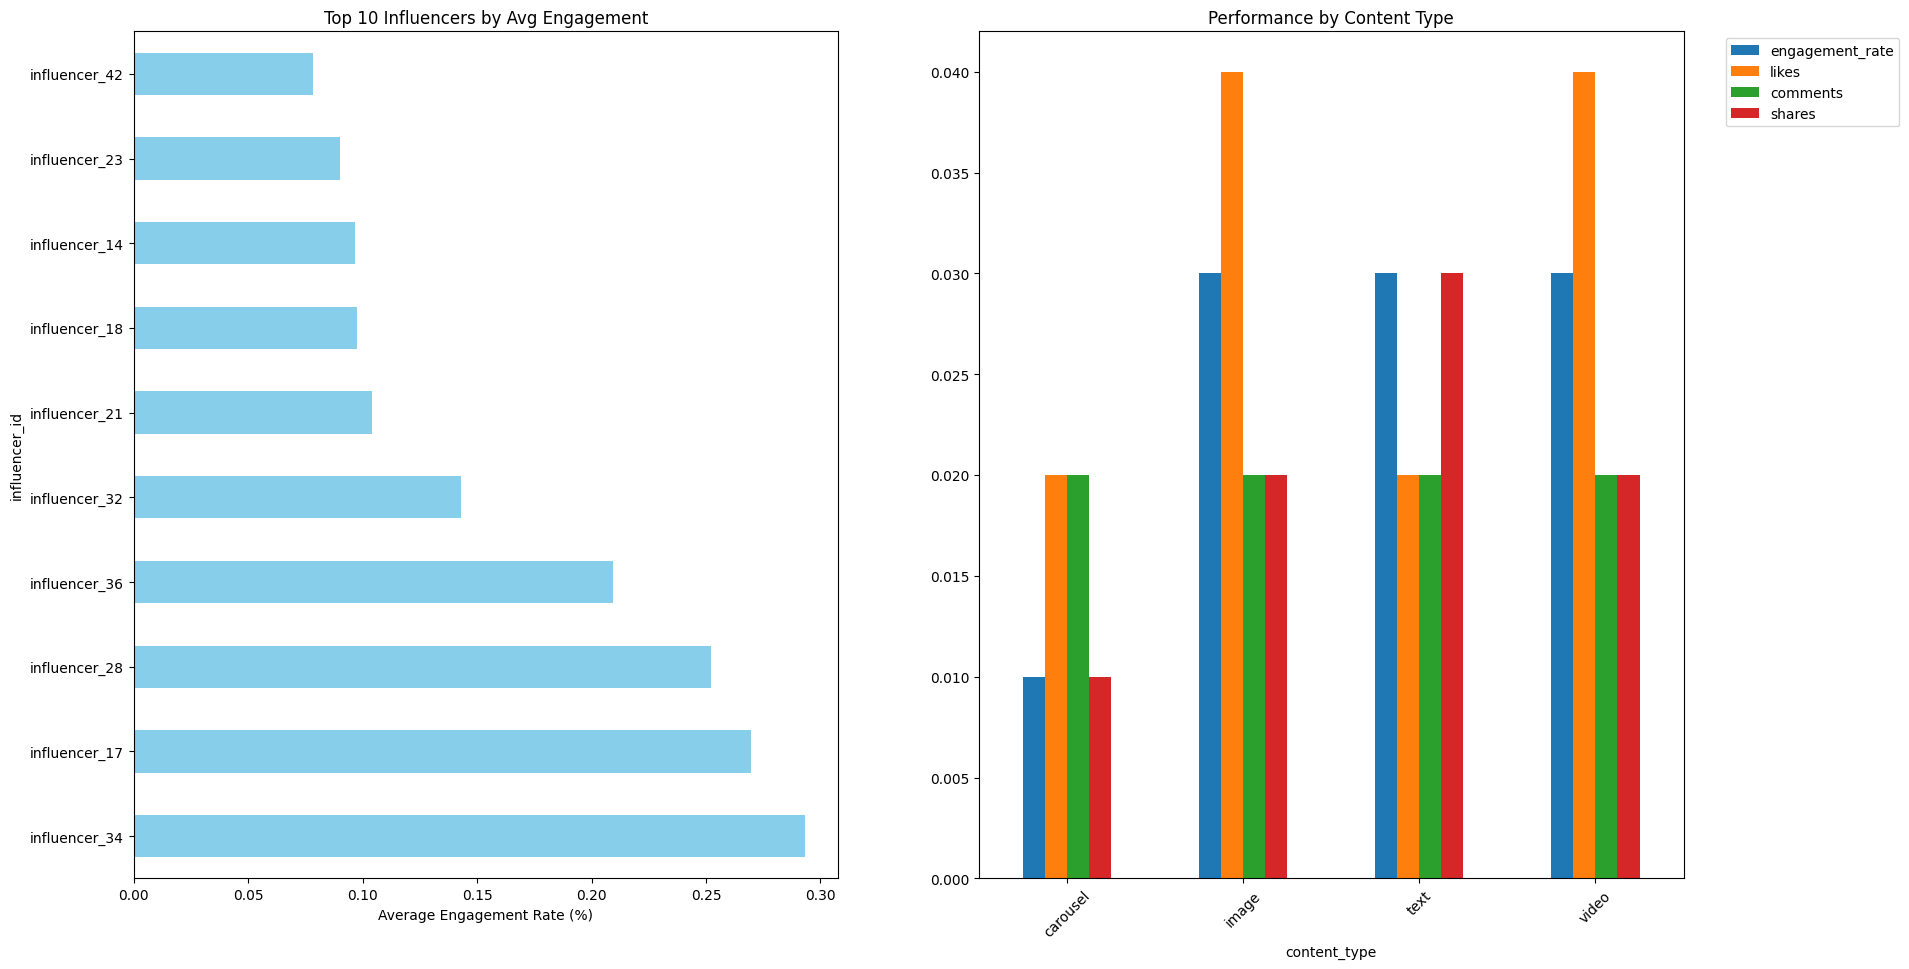

In [78]:
plt.figure(figsize=(20, 11))

# Top influencers by engagement
plt.subplot(1, 2, 1)
top_influencers = df_scaled.groupby('influencer_id')['engagement_rate'].mean().nlargest(10)
top_influencers.plot(kind='barh', color='skyblue')
plt.title('Top 10 Influencers by Avg Engagement')
plt.xlabel('Average Engagement Rate (%)')

# Content type performance comparison
plt.subplot(1, 2, 2)
content_performance = df_scaled.groupby('content_type').agg({
    'engagement_rate': 'mean',
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean'
}).abs().round(2)
content_performance.plot(kind='bar', ax=plt.gca())
plt.title('Performance by Content Type')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



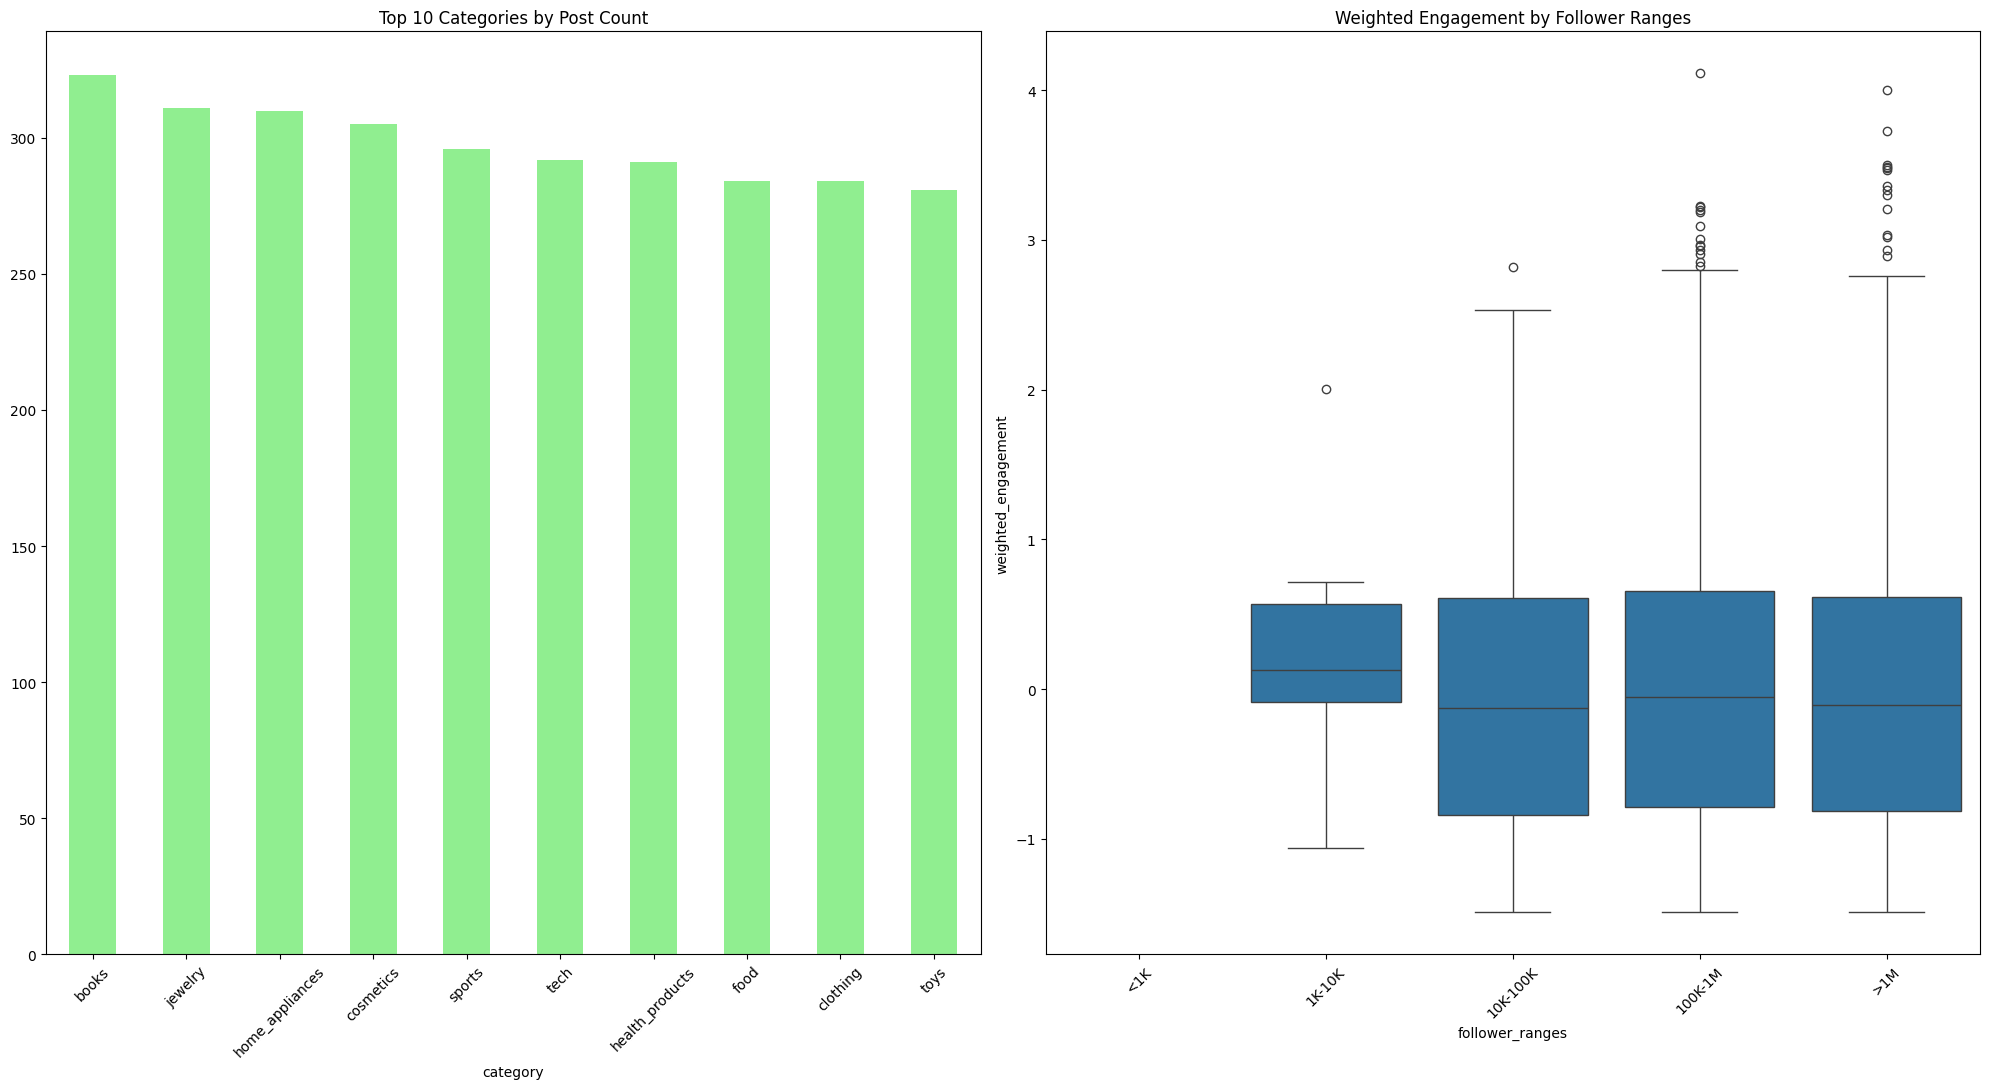

In [79]:
plt.figure(figsize=(20, 11))

# Category analysis
plt.subplot(1, 2, 1)
top_categories = df_scaled['category'].value_counts().head(10)
top_categories.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Categories by Post Count')
plt.xticks(rotation=45)

# Engagement rate by follower count ranges (use raw follower counts)
plt.subplot(1, 2, 2)
df_scaled['follower_ranges'] = pd.cut(df['follower_count'],  # <-- raw counts
                                      bins=[0, 1000, 10000, 100000, 1000000, float('inf')],
                                      labels=['<1K', '1K-10K', '10K-100K', '100K-1M', '>1M'])
sns.boxplot(data=df_scaled, x='follower_ranges', y='weighted_engagement')
plt.title('Weighted Engagement by Follower Ranges')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Summary Statistics Visualization

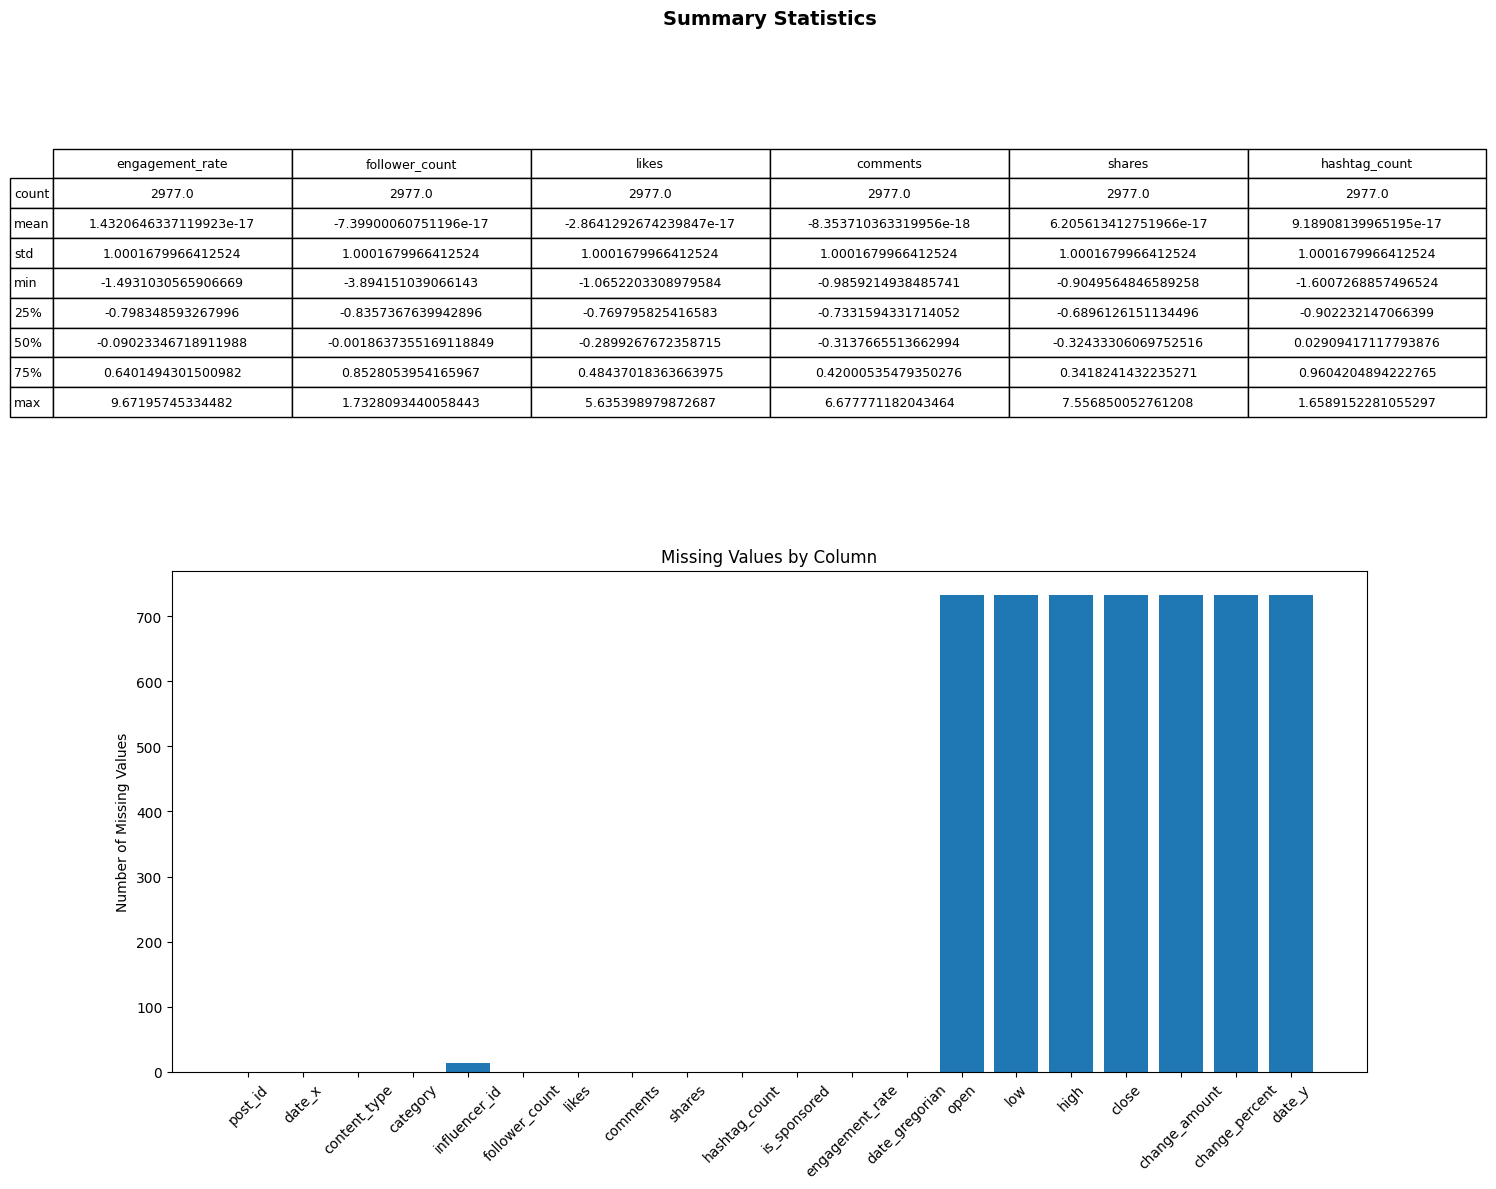

In [80]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Summary statistics table
axes[0].axis('tight')
axes[0].axis('off')
summary_stats = df_scaled[['engagement_rate', 'follower_count', 'likes', 'comments', 'shares', 'hashtag_count']].describe()

table = axes[0].table(
    cellText=summary_stats.values,
    rowLabels=summary_stats.index, 
    colLabels=summary_stats.columns, 
    cellLoc='center', 
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
axes[0].set_title('Summary Statistics', fontsize=14, fontweight='bold')

# Missing values visualization
df_merge = pd.merge(df_social, df_dollar, on='date_gregorian', how='left')
axes[1].bar(range(len(df_merge.isna().sum())), df_merge.isna().sum())
axes[1].set_xticks(range(len(df_merge.columns)))
axes[1].set_xticklabels(df_merge.columns, rotation=45)
axes[1].set_title('Missing Values by Column')
axes[1].set_ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()

# ******************************* Analysis *****************************

# Clustering

In [224]:
# Group data by influencer_id and calculate aggregation statistics

category_per_influencer = df_scaled.groupby('influencer_id')['category'].agg(lambda x: x.mode().iloc[0]).reset_index()

df_grouped = df_scaled.groupby('influencer_id').agg({
    'follower_count': 'max',           # حداکثر تعداد دنبال‌کننده برای هر اینفلوئنسر
    'engagement_rate': 'mean',         # میانگین نرخ تعامل
    'weighted_engagement': 'mean',     # میانگین تعامل وزن‌دار
    'likes': 'mean',                   # میانگین لایک‌ها
    'comments': 'mean',                # میانگین کامنت‌ها
    'shares': 'mean',                  # میانگین اشتراک‌گذاری‌ها
    'is_sponsored': 'mean',            # نسبت پست‌های حمایت‌شده (بین 0 و 1)
    'hashtag_count': 'mean'            # میانگین تعداد هشتگ‌ها
}).reset_index()

در این مرحله، داده‌ها را بر اساس هر اینفلوئنسر گروه‌بندی کردیم و معیارهای مهم مانند بیشترین فالوور، میانگین نرخ تعامل، تعداد لایک و کامنت و… را محاسبه کردیم. این باعث می‌شود ویژگی‌ها برای هر اینفلوئنسر خلاصه شود و بتوانیم خوشه‌بندی کنیم.

In [225]:
# Log transform the follower count to reduce skewness

df_grouped = df_grouped.merge(category_per_influencer, on='influencer_id', how='left')

چون تعداد فالوورها معمولاً توزیع نامتقارن و بزرگی دارد (مثلاً یک نفر میلیون‌ها فالوور دارد و برخی فقط چند هزار)، با گرفتن لگاریتم (log1p) توزیع داده‌ها متعادل‌تر می‌شود و خوشه‌بندی بهتر انجام می‌شود.

In [114]:
# Select the features we will use for clustering
features_for_clustering = ['log_follower_count', 'engagement_rate', 'weighted_engagement',
                           'likes', 'comments', 'shares', 'is_sponsored', 'hashtag_count']

X = df_grouped[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ویژگی‌هایی که می‌خواهیم خوشه‌بندی را با آن‌ها انجام دهیم انتخاب شدند. این‌ها همان ویژگی‌های مهمی هستند که رفتار و تاثیرگذاری اینفلوئنسرها را نشان می‌دهند.

استانداردسازی باعث می‌شود که همه ویژگی‌ها به یک مقیاس بروند (میانگین صفر و واریانس یک). این کار مهم است چون اگر یک ویژگی عددهای خیلی بزرگ داشته باشد، الگوریتم خوشه‌بندی تحت تاثیر آن قرار می‌گیرد و نتایج درست نمی‌شود.

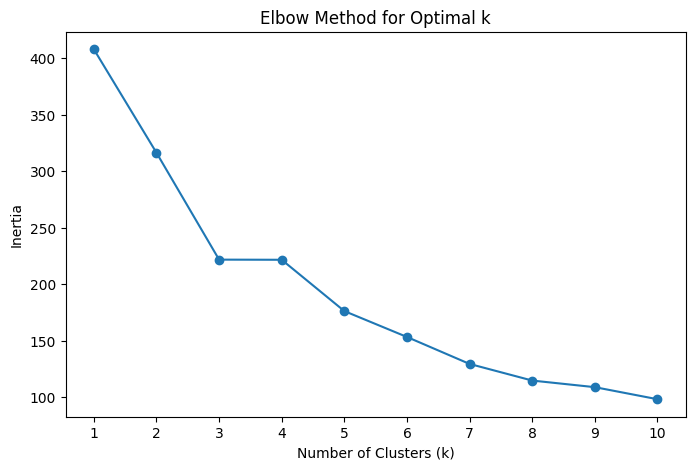

In [115]:
from sklearn.cluster import KMeans

# Determine optimal clusters with Elbow method
inertia = []
K_range = range(1, 11)  # تست تعداد خوشه‌ها از 1 تا 10

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)  # inertia مقدار درون‌خوشه‌ای است که باید کم شود

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.show()

در اینجا با استفاده از روش «آرنج» (Elbow) تعداد بهینه خوشه‌ها را تعیین می‌کنیم. نمودار مقدار inertia (فاصله نمونه‌ها تا مرکز خوشه) را نسبت به تعداد خوشه‌ها رسم می‌کنیم. نقطه‌ای که کاهش inertia کند می‌شود (شبیه آرنج خمیده) تعداد مناسب خوشه‌هاست.


Cluster characteristics for k=3:
   log_follower_count  engagement_rate  weighted_engagement     likes  \
0            0.979822        -0.057194            -0.064637 -0.075083   
1            0.695882        -0.240382            -0.272398 -0.441572   
2            0.995007         0.084371             0.093842  0.116394   

   comments    shares  is_sponsored  hashtag_count  cluster  
0 -0.064396 -0.070588      0.601131      -0.009078        0  
1 -0.493625 -0.339355      0.642857       0.528019        1  
2  0.096716  0.114462      0.601279       0.006150        2  
Cluster sizes:
cluster_3
0    31
2    19
1     1
Name: count, dtype: int64


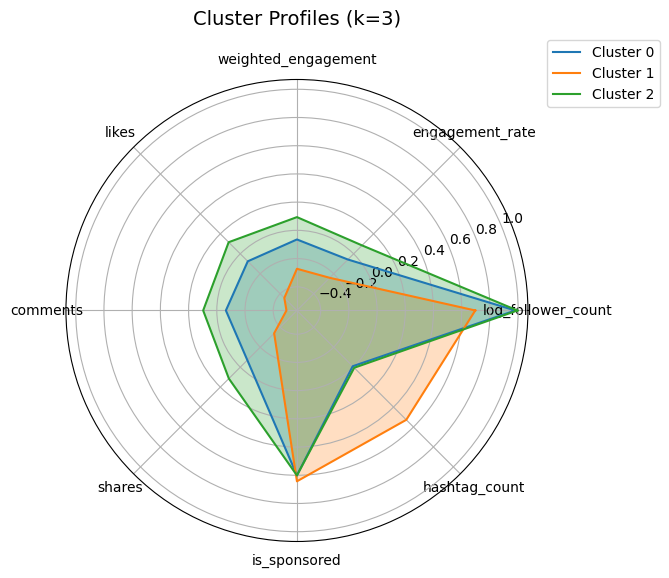

In [116]:
# Fit KMeans for k=3
k = 3
km = KMeans(n_clusters=k, random_state=42)
clusters = km.fit_predict(X_scaled)
df_grouped[f'cluster_{k}'] = clusters

# Map human-readable names
cluster_names = {
    0: 'Cluster 1 : Med_Fol-Mod_Spon',
    1: 'Cluster 2 : Low_Fol-Low_EngR-High_Hash',
    2: 'Cluster 3 : Hi_Fol-Hi_Eng-Bal_Spon'
}
df_grouped['cluster_name'] = df_grouped[f'cluster_{k}'].map(cluster_names)

# Cluster centers in scaled form
centroids_scaled = km.cluster_centers_
centroids = pd.DataFrame(scaler.inverse_transform(centroids_scaled), columns=features_for_clustering)
centroids['cluster'] = range(k)

# Print cluster info
print(f"\nCluster characteristics for k={k}:")
print(centroids)
print("Cluster sizes:")
print(df_grouped[f'cluster_{k}'].value_counts())

# Radar plot
angles = np.linspace(0, 2 * np.pi, len(features_for_clustering), endpoint=False).tolist()
angles += angles[:1]  # close loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for _, row in centroids.iterrows():
    values = row[features_for_clustering].tolist()
    values += values[:1]  # close loop
    ax.plot(angles, values, label=f"Cluster {int(row['cluster'])}")
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features_for_clustering, fontsize=10)
ax.set_title(f"Cluster Profiles (k={k})", size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

Cluster 0: Medium Followers, Moderate Sponsored


Cluster 1: Low Followers, Low Engagement, High Hashtags & Sponsored



High Followers, High Engagement, Balanced Sponsored


# ِExport Data for Dashboard 

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- 1. گروه‌بندی داده‌ها بر اساس influencer_id ---
df_grouped = df.groupby('influencer_id').agg({
    'follower_count': 'max',
    'engagement_rate': 'mean',
    'weighted_engagement': 'mean',
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'is_sponsored': 'mean',
    'hashtag_count': 'mean',
    'post_id': 'count'   # اینجا اضافه کردی

}).reset_index()

# --- 2. استخراج اولین تاریخ میلادی هر influencer ---
df_dates = df.groupby('influencer_id')['date_gregorian'].min().reset_index()

# --- 3. ادغام تاریخ میلادی با دیتافریم گروه‌بندی شده ---
df_grouped = df_grouped.merge(df_dates, on='influencer_id', how='left')

# --- 4. لاگ تبدیل follower_count برای کاهش نامتقارنی ---
df_grouped['log_follower_count'] = np.log1p(df_grouped['follower_count'])

# --- 5. انتخاب ویژگی‌ها برای خوشه‌بندی ---
features_for_clustering = [
    'log_follower_count', 'engagement_rate', 'weighted_engagement',
    'likes', 'comments', 'shares', 'is_sponsored', 'hashtag_count'
]

X = df_grouped[features_for_clustering].copy()

# --- 6. استانداردسازی ویژگی‌ها ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 7. خوشه‌بندی KMeans با k=3 ---
k = 3
km = KMeans(n_clusters=k, random_state=42)
clusters = km.fit_predict(X_scaled)
df_grouped[f'cluster_{k}'] = clusters

# --- 8. اضافه کردن ویژگی‌های استاندارد شده به دیتافریم ---
df_scaled_features = pd.DataFrame(X_scaled, columns=features_for_clustering, index=df_grouped.index)
df_final = pd.concat([df_grouped, df_scaled_features], axis=1)

# --- 9. دیکشنری نام خوشه‌ها ---
cluster_names = {
    0: 'cluster 1 : Med_Fol-Mod_Spon',
    1: 'cluster 2 : Low_Fol-Low_EngR-High_Hash',
    2: 'cluster 3 : Hi_Fol-Hi_Eng-Bal_Spon'
}
df_final['cluster_name'] = df_final[f'cluster_{k}'].map(cluster_names)
# تبدیل ستون تاریخ به نوع datetime در هر دو دیتافریم
df_final['date_gregorian'] = pd.to_datetime(df_final['date_gregorian'], errors='coerce')
df_dollar['date_gregorian'] = pd.to_datetime(df_dollar['date_gregorian'], errors='coerce')

# حالا ادغام را انجام بده
df_final = df_final.merge(df_dollar[['date_gregorian', 'close']], on='date_gregorian', how='left')
# --- 10. ادغام قیمت دلار با df_final بر اساس تاریخ میلادی ---
# فرض می‌کنیم df_dollar دیتافریمی است که حداقل ستون‌های ['date_gregorian', 'dollar_price'] را دارد
df_final = df_final.merge(df_dollar[['date_gregorian', 'close']], on='date_gregorian', how='left')

# --- 11. ذخیره خروجی نهایی برای داشبورد ---
df_final.to_csv('final_clustered_data_PBI.csv', index=False)


#df_final.to_csv('final_clustered_data_PBI.csv', index=False)

# Q1 : Text Analysis 

### Hashtag influence to Engagement Rate

In [118]:
df_social[['hashtag_count', 'engagement_rate']].describe()

,hashtag_count,engagement_rate
count,2979.000000,2979.000000
mean,6.873112,3.411534
std,4.294953,2.245787
min,0.000000,0.060000
25%,3.000000,1.620000
50%,7.000000,3.210000
75%,11.000000,4.845000
max,14.000000,25.130000


/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/2055467021.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_engagement = df_grouped.groupby(['cluster_3', 'hashtag_bin'])['engagement_rate'].mean().unstack()


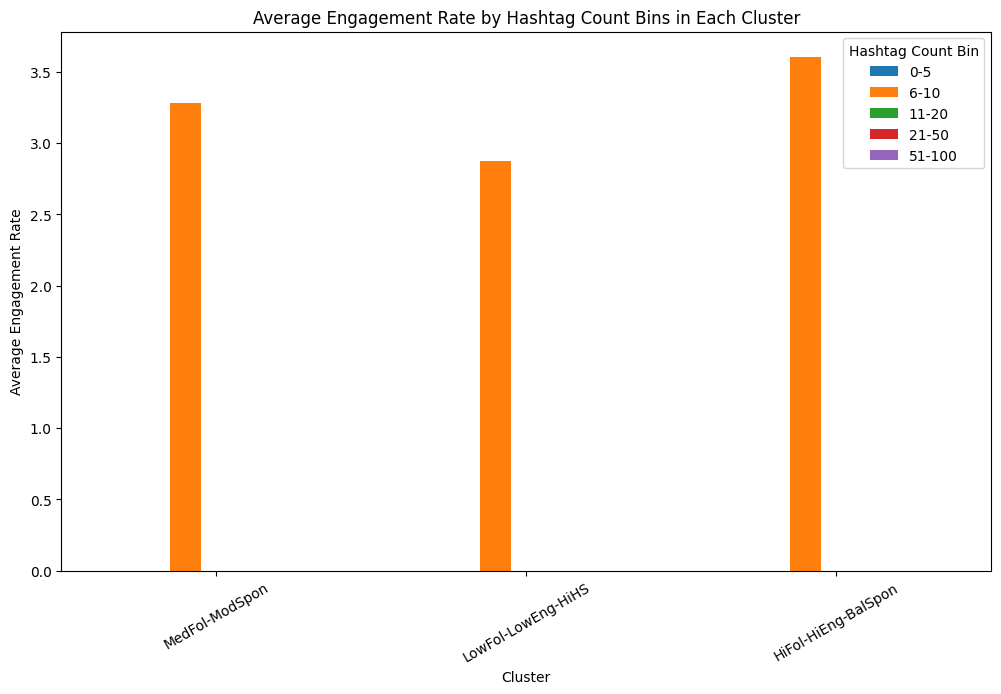

In [119]:
cluster_names = {
    0: 'MedFol-ModSpon',     # Medium Followers, Moderate Sponsored
    1: 'LowFol-LowEng-HiHS', # Low Followers, Low Engagement, High Hashtags & Sponsored
    2: 'HiFol-HiEng-BalSpon' # High Followers, High Engagement, Balanced Sponsored
}

# دسته‌بندی تعداد هشتگ
bins = [0, 5, 10, 20, 50, 100]
labels = ['0-5', '6-10', '11-20', '21-50', '51-100']

df_grouped['hashtag_bin'] = pd.cut(df_grouped['hashtag_count'], bins=bins, labels=labels)

# میانگین نرخ تعامل در هر دسته هشتگ و خوشه
mean_engagement = df_grouped.groupby(['cluster_3', 'hashtag_bin'])['engagement_rate'].mean().unstack()

# تغییر نام ایندکس خوشه‌ها به اسامی توصیفی
mean_engagement.index = mean_engagement.index.map(cluster_names)

# رسم نمودار
mean_engagement.plot(kind='bar', figsize=(12,7))
plt.title('Average Engagement Rate by Hashtag Count Bins in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Engagement Rate')
plt.legend(title='Hashtag Count Bin')
plt.xticks(rotation=30)
plt.show()

In [120]:
correlation = df_grouped['hashtag_count'].corr(df_grouped['engagement_rate'])
print(f"Correlation: {correlation:.2f}")

Correlation: -0.13


### If correlation > 0.5, there’s a strong positive relation. 
### If it’s close to 0, no linear relation.

# Q2 : Interaction  Analysis 

### Part 1 : Engagement Rate for each post or Influencer and analyse 

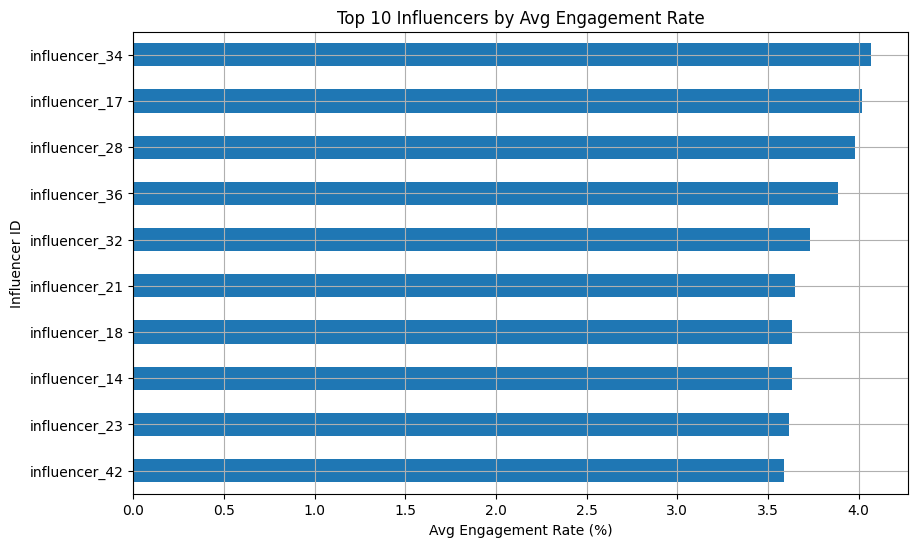

In [125]:
engagement_by_influencer = df_grouped.groupby('influencer_id')['engagement_rate'].mean().sort_values(ascending=False)

engagement_by_influencer.head(10).plot(kind='barh', figsize=(10, 6), title="Top 10 Influencers by Avg Engagement Rate")
plt.xlabel("Avg Engagement Rate (%)")
plt.ylabel("Influencer ID")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [126]:
# پیدا کردن اینفلوئنسرهایی که بیشترین پست را دارند
top_influencers_by_posts = (
    df.groupby('influencer_id')['post_id'].count().sort_values(ascending=False).head(10)
)

print(top_influencers_by_posts)

influencer_id
influencer_5     80
influencer_47    79
influencer_6     76
influencer_21    74
influencer_24    73
influencer_10    69
influencer_46    69
influencer_19    68
influencer_34    68
influencer_0     67
Name: post_id, dtype: int64


/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/2801171791.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_influencer_avg, x='cluster_name', y='engagement_rate', palette='Set2')


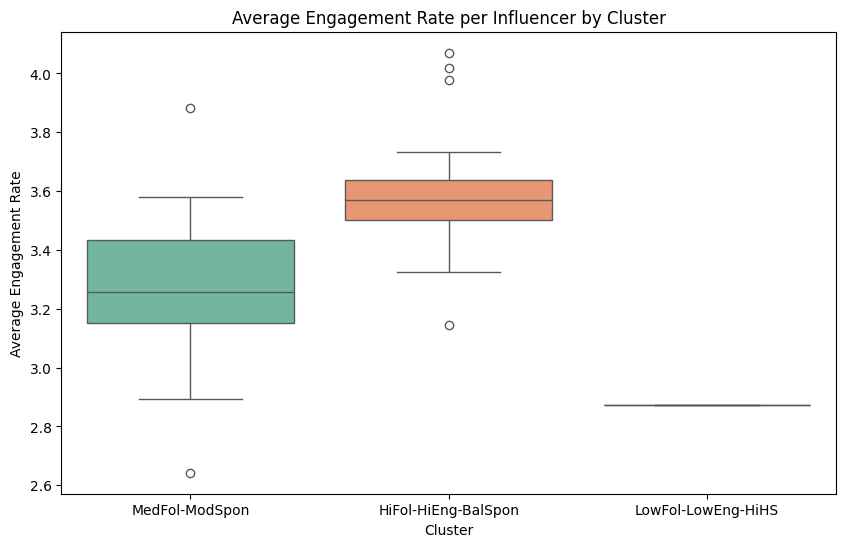

In [127]:
# فرض: df_grouped شامل ستون cluster_3 و influencer_id هست
df_influencer_avg = df_grouped.groupby(['influencer_id', 'cluster_3']).agg({'engagement_rate': 'mean'}).reset_index()

# نام خوشه‌ها رو اضافه کن
cluster_names = {
    0: 'MedFol-ModSpon',
    1: 'LowFol-LowEng-HiHS',
    2: 'HiFol-HiEng-BalSpon'
}
df_influencer_avg['cluster_name'] = df_influencer_avg['cluster_3'].map(cluster_names)

# نمودار جعبه‌ای (Boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df_influencer_avg, x='cluster_name', y='engagement_rate', palette='Set2')
plt.title('Average Engagement Rate per Influencer by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Engagement Rate')
plt.show()

### Part 2 : Correlation between Followers and Engagement Rate with Statistic Analysis 

In [128]:
from scipy.stats import pearsonr

# گرفتن دو ستون مورد نظر
followers = df_scaled['follower_count']
engagement = df_scaled['engagement_rate']

# محاسبه ضریب همبستگی پیرسون و p-value
corr_coef, p_value = pearsonr(followers, engagement)

print(f"Pearson Correlation Coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3e}")

Pearson Correlation Coefficient: -0.011
P-value: 5.589e-01


In [129]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation
pearson_corr, pearson_p = pearsonr(df_grouped['follower_count'], df_grouped['engagement_rate'])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")

# Spearman Correlation (non-linear rank correlation)
spearman_corr, spearman_p = spearmanr(df_grouped['follower_count'], df_grouped['engagement_rate'])
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Pearson correlation: 0.255, p-value: 0.071
Spearman correlation: 0.214, p-value: 0.132


In [130]:
for cluster_id in sorted(df_grouped['cluster_3'].unique()):
    cluster_data = df_grouped[df_grouped['cluster_3'] == cluster_id]
    
    if len(cluster_data) < 2:
        print(f"\nCluster {cluster_id}: Not enough data for correlation")
        continue
    
    pearson_corr, pearson_p = pearsonr(cluster_data['follower_count'], cluster_data['engagement_rate'])
    spearman_corr, spearman_p = spearmanr(cluster_data['follower_count'], cluster_data['engagement_rate'])
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
    print(f"  Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")


Cluster 0:
  Pearson correlation: -0.263, p-value: 0.152
  Spearman correlation: -0.223, p-value: 0.229

Cluster 1: Not enough data for correlation

Cluster 2:
  Pearson correlation: 0.326, p-value: 0.173
  Spearman correlation: 0.379, p-value: 0.110


If it’s negative, it suggests that higher followers may relate to lower engagement (common trend).


If it’s close to 0, it suggests no linear relationship.


If it’s positive, higher followers may relate to higher engagement (less common).



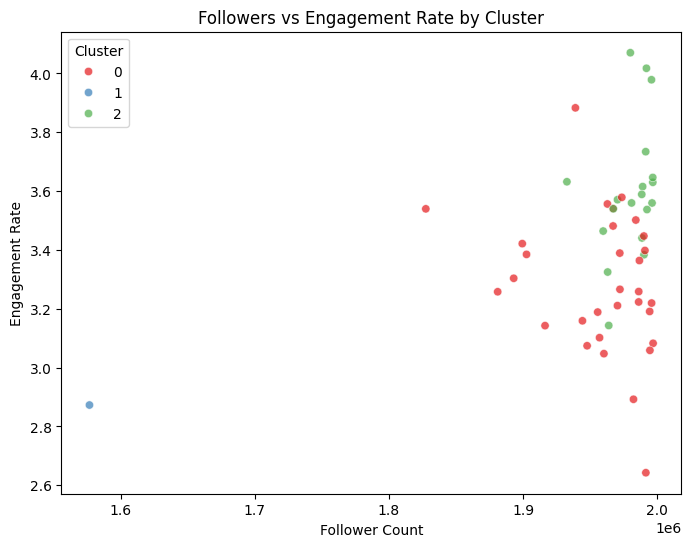

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_grouped,
    x='follower_count',
    y='engagement_rate',
    hue='cluster_3',
    palette='Set1',
    alpha=0.7
)
plt.title('Followers vs Engagement Rate by Cluster')
plt.xlabel('Follower Count')
plt.ylabel('Engagement Rate')
plt.legend(title='Cluster')
plt.show()

In [132]:
df_grouped['cluster_3'].value_counts()

cluster_3
0    31
2    19
1     1
Name: count, dtype: int64

### Part 3 : Average of Engagement Rate affect to each Content type with Statistical tests

In [136]:
df.groupby('content_type')['engagement_rate'].mean()

content_type
carousel    3.431897
image       3.343102
text        3.344125
video       3.478615
Name: engagement_rate, dtype: float64

In [139]:
from scipy.stats import f_oneway

# فیلتر داده‌ها برای گروه‌های مورد نظر که حداقل 2 نمونه داشته باشند
image = df[df['content_type'] == 'image']['engagement_rate']
video = df[df['content_type'] == 'video']['engagement_rate']
carousel = df[df['content_type'] == 'carousel']['engagement_rate']
text = df[df['content_type'] == 'text']['engagement_rate']

groups = [g for g in [image, video, carousel, text] if len(g) >= 2]

anova_result = f_oneway(*groups)
print(f"F-Statistic: {anova_result.statistic:.4f}, P-Value: {anova_result.pvalue:.4f}")

F-Statistic: 0.7449, P-Value: 0.5252


In [146]:
from scipy.stats import ttest_ind
import pandas as pd

# بررسی و اضافه کردن ستون content_type در صورت نبود
if 'content_type' not in df_grouped.columns:
    if 'content_type' in df.columns:
        df_grouped = df_grouped.merge(
            df[['influencer_id', 'content_type']],
            on='influencer_id',
            how='left'
        )
    else:
        raise KeyError("ستون 'content_type' وجود ندارد.")

#  t-test for each cluster
for cluster_id in sorted(df_grouped['cluster_3'].unique()):
    cluster_data = df_grouped[df_grouped['cluster_3'] == cluster_id]

    content_types = cluster_data['content_type'].unique()
    if len(content_types) != 2:
        print(f"\cluster {cluster_id}:There is not enough data for t-test ")
        continue

    group1 = cluster_data[cluster_data['content_type'] == content_types[0]]['engagement_rate'].dropna()
    group2 = cluster_data[cluster_data['content_type'] == content_types[1]]['engagement_rate'].dropna()

    if len(group1) < 2 or len(group2) < 2:
        print(f"\nکلاستر {cluster_id}: There is not enough data to perform a t-test.")
        continue

    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"\nکلاستر {cluster_id}:")
    print(f"  {content_types[0]} vs {content_types[1]}")
    print(f"  t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
    if p_val < 0.05:
        print("Result: There is a significant difference between the engagement rates of these two types of content")
    else:
        print("Result: No significant difference was found.")

\cluster 0:There is not enough data for t-test 
\cluster 1:There is not enough data for t-test 
\cluster 2:There is not enough data for t-test 


In [145]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

model = ols('engagement_rate ~ content_type', data=df_grouped).fit()
tukey = pairwise_tukeyhsd(endog=df_grouped['engagement_rate'], groups=df_grouped['content_type'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
carousel  image  -0.0081 0.9429 -0.0453  0.029  False
carousel   text   0.0039 0.9969 -0.0449 0.0528  False
carousel  video   0.0011 0.9998 -0.0347  0.037  False
   image   text   0.0121 0.9022 -0.0331 0.0573  False
   image  video   0.0093 0.8651 -0.0214 0.0399  False
    text  video  -0.0028 0.9984 -0.0469 0.0413  False
-----------------------------------------------------


### Part 4 : Engagement Rate affect to Sponsered or Not Sponsered Post 

In [147]:
df_scaled['is_sponsored'].value_counts()

is_sponsored
True     1789
False    1188
Name: count, dtype: int64

# Q3 : Time Analysis 

### Part 1 : Engagement trend in different timeframe (Day, Week, Month)

In [148]:
# اطمینان از اینکه ستون تاریخ به فرمت datetime تبدیل شده
df['date_gregorian'] = pd.to_datetime(df['date_gregorian'])

# استخراج روز، هفته، ماه
df['day'] = df['date_gregorian'].dt.date
df['week'] = df['date_gregorian'].dt.isocalendar().week
df['month'] = df['date_gregorian'].dt.to_period('M')

/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/3363491244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_gregorian'] = pd.to_datetime(df['date_gregorian'])
/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/3363491244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['date_gregorian'].dt.date
/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/3363491244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [149]:
#  میانگین روزانه:
daily_engagement = df.groupby('day')['engagement_rate'].mean().reset_index()

In [150]:
# میانگین هفتگی:
weekly_engagement = df.groupby('week')['engagement_rate'].mean().reset_index()

In [151]:
#  میانگین ماهانه:
monthly_engagement = df.groupby('month')['engagement_rate'].mean().reset_index()

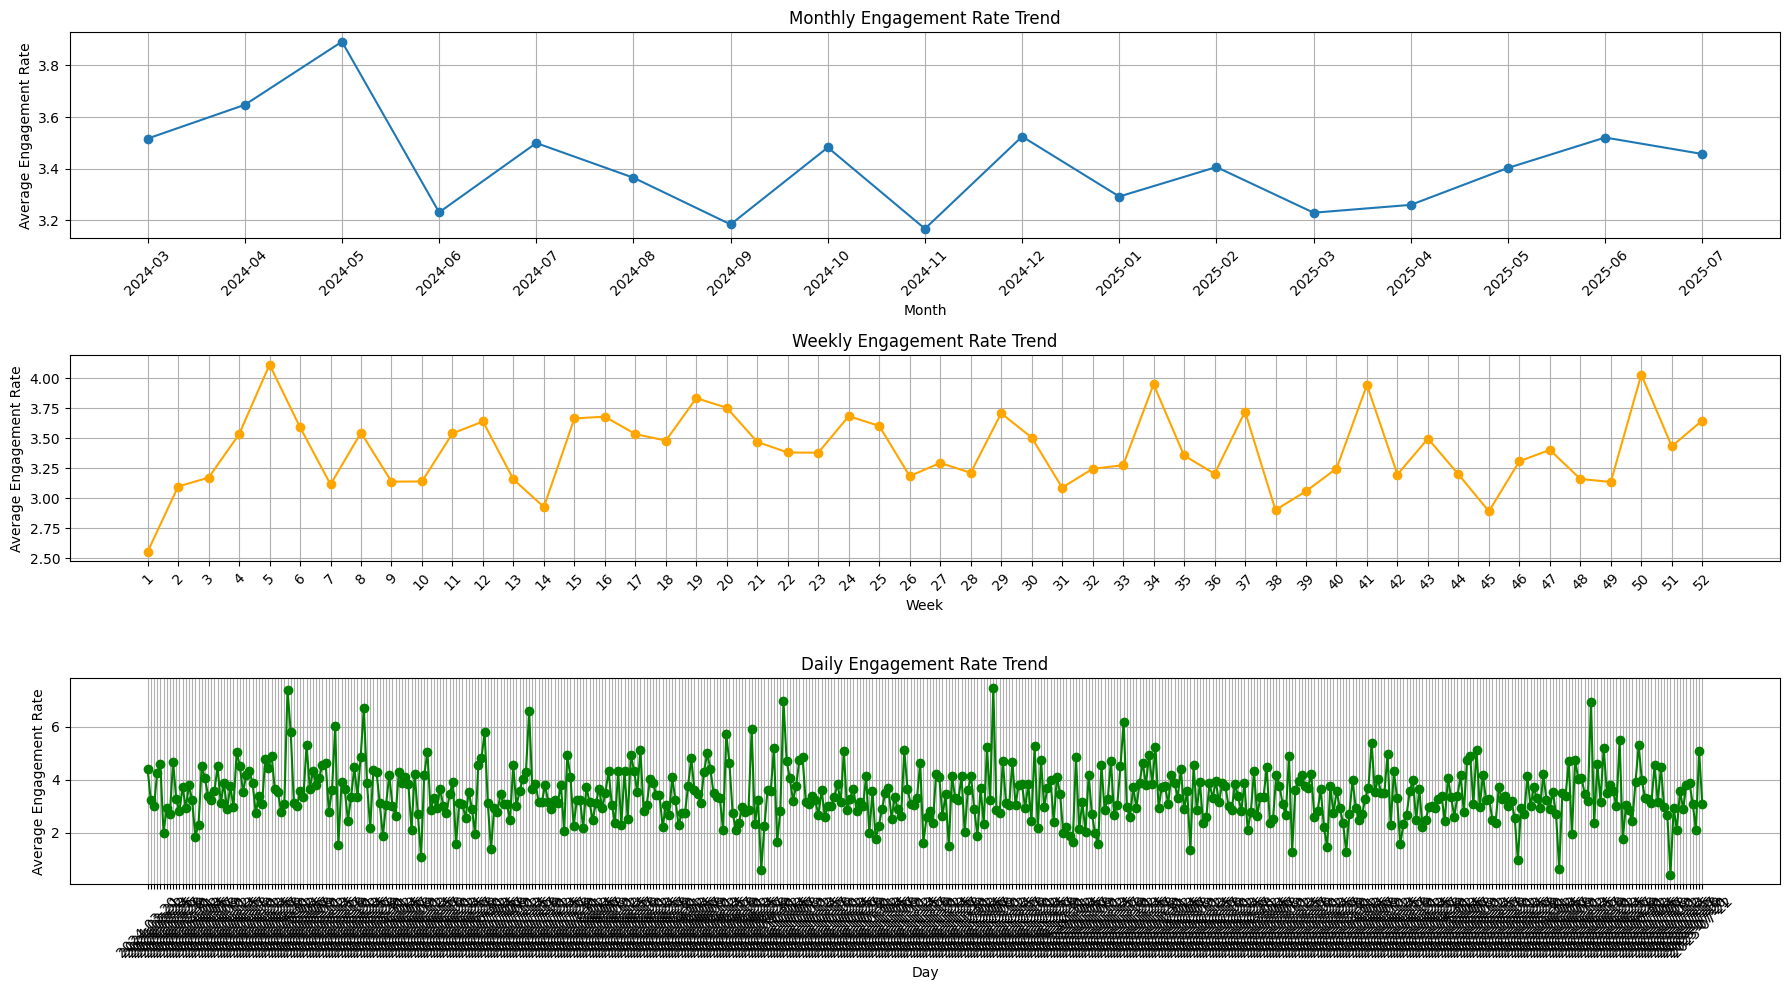

In [152]:
import matplotlib.pyplot as plt

# یک figure اصلی بساز
plt.figure(figsize=(18, 10))

# نمودار 1: ماهانه
plt.subplot(3, 1, 1)
plt.plot(monthly_engagement['month'].astype(str), monthly_engagement['engagement_rate'], marker='o')
plt.title('Monthly Engagement Rate Trend')
plt.xlabel('Month')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.grid(True)

# نمودار 2: هفتگی
plt.subplot(3, 1, 2)
plt.plot(weekly_engagement['week'].astype(str), weekly_engagement['engagement_rate'], marker='o', color='orange')
plt.title('Weekly Engagement Rate Trend')
plt.xlabel('Week')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.grid(True)

# نمودار 3: روزانه
plt.subplot(3, 1, 3)
plt.plot(daily_engagement['day'].astype(str), daily_engagement['engagement_rate'], marker='o', color='green')
plt.title('Daily Engagement Rate Trend')
plt.xlabel('Day')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.grid(True)

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()



### Part 2 : Correlation between dollar price and Engagement Rate to analyse followers behaviour 

In [156]:
merged_df = df_grouped.merge(df[['date_gregorian', 'close']], on='date_gregorian', how='inner')

correlation = merged_df['engagement_rate'].corr(merged_df['close'])
print("Correlation between Engagement Rate and Dollar Close Price:", correlation)

Correlation between Engagement Rate and Dollar Close Price: 0.006587880318474046


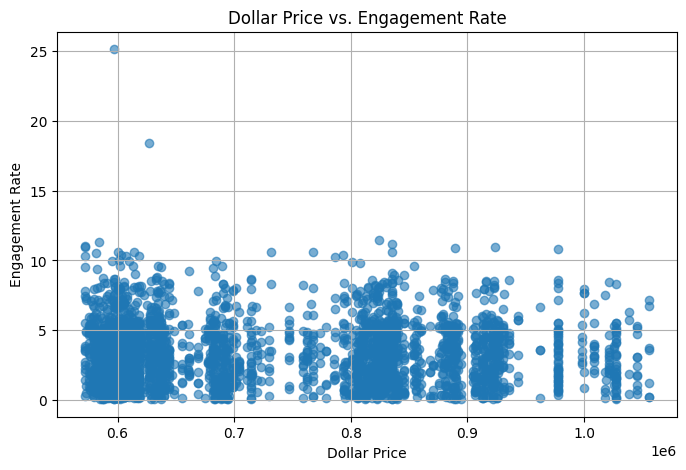

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['close'], df['engagement_rate'], alpha=0.6)
plt.title('Dollar Price vs. Engagement Rate')
plt.xlabel('Dollar Price')
plt.ylabel('Engagement Rate')
plt.grid(True)
plt.show()

### Part 3 : Anlayse  if Engagement Rate increses during Holidays (Norouz, Yalda, Fetr Eid , ...)

In [168]:
import pandas as pd

# ایجاد لیست تاریخ‌های تعطیلات (میلادی)
holiday_dates = pd.to_datetime([
    '2024-03-20', '2024-03-21', '2024-03-22', '2024-03-23',  # نوروز
    '2024-03-19',  # ملی شدن صنعت نفت
    '2024-04-01',  # روز طبیعت (13 بدر)
    '2024-02-06',  # مبعث
    '2024-04-10', '2024-04-11',  # عید فطر
    '2024-06-16',  # عید قربان
    '2024-06-24',  # عید غدیر
    '2024-07-15',  # تاسوعا
    '2024-07-16',  # عاشورا
    '2024-08-25',  # اربعین
    '2024-09-02',  # رحلت پیامبر
    '2024-12-21'   # یلدا
])

In [173]:
df_grouped['is_holiday'] = df_scaled['date_gregorian'].isin(holiday_dates)

In [175]:
from scipy.stats import ttest_ind

holiday_eng = df_grouped[df_grouped['is_holiday'] == True]['engagement_rate']
nonholiday_eng = df_grouped[df_grouped['is_holiday'] == False]['engagement_rate']

t_stat, p_val = ttest_ind(holiday_eng, nonholiday_eng, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")

T-Statistic: 4.8058, P-Value: 0.0000


این آزمون t مستقل مقایسه کرده است که آیا میانگین نرخ تعامل (engagement rate) در روزهای تعطیل با روزهای غیرتعطیل تفاوت معنی‌داری دارد یا نه.
	•	مقدار آماره تی ۴.۸۰۵۸ نشان می‌دهد که تفاوت بین دو گروه نسبتاً بزرگ است.
	•	مقدار پی (P-Value) بسیار کوچک (تقریباً صفر) است، که این یعنی احتمال اینکه این تفاوت فقط بر اثر شانس باشد، بسیار بسیار کم است.

نتیجه‌گیری:

می‌توان با اطمینان بالا گفت که نرخ تعامل در روزهای تعطیل با روزهای غیرتعطیل تفاوت معنی‌داری دارد. یعنی نرخ تعامل در روزهای تعطیل به طور قابل توجهی متفاوت (معمولاً بیشتر) است نسبت به روزهای عادی.

اگر دوست داری، می‌توانیم نمودار هم برای این مقایسه رسم کنیم یا تحلیل دقیق‌تری ارائه بدهم.

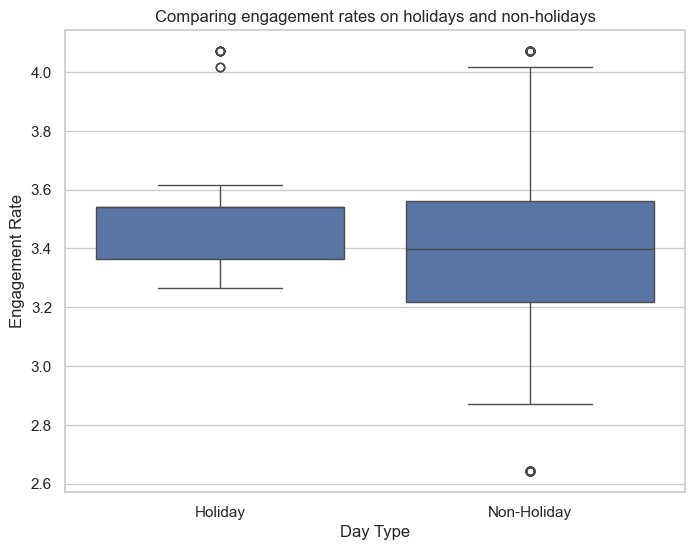

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# داده‌ها را آماده می‌کنیم
df_grouped['holiday_label'] = df_grouped['is_holiday'].map({True: 'Holiday', False: 'Non-Holiday'})

plt.figure(figsize=(8,6))
sns.boxplot(x='holiday_label', y='engagement_rate', data=df_grouped)
plt.title('Comparing engagement rates on holidays and non-holidays')
plt.xlabel('Day Type')
plt.ylabel('Engagement Rate')
plt.show()

# Q4 : Categorical Analysis 

### Part 1 : Average Engagemnt Rate for each category with Bar-Chart or Statistical Tests

/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/378487449.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='category', y='engagement_rate', data=df_scaled, estimator='mean', ci='sd')


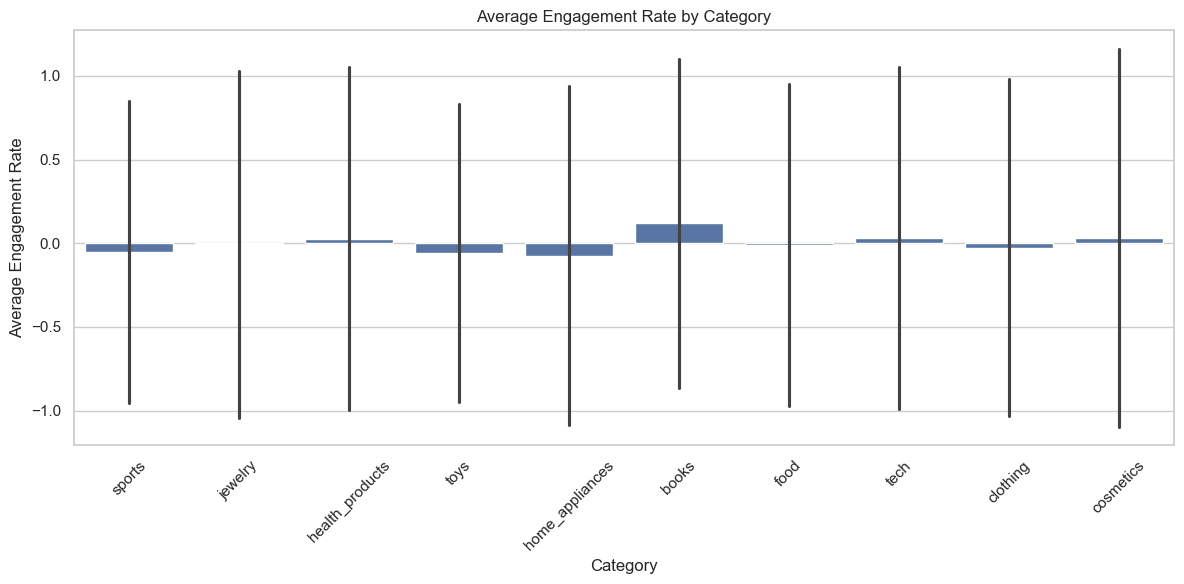

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Bar chart for average engagement rate by category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='engagement_rate', data=df_scaled, estimator='mean', ci='sd')
plt.title('Average Engagement Rate by Category')
plt.xlabel('Category')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [182]:
from scipy.stats import f_oneway

# Group engagement rates by each category
category_groups = df_scaled.groupby('category')['engagement_rate'].apply(list)

# Run ANOVA test
anova_result = f_oneway(*category_groups)

print(f"F-Statistic: {anova_result.statistic:.4f}, P-Value: {anova_result.pvalue:.4f}")

F-Statistic: 1.0174, P-Value: 0.4233


### Part 2 : Find top Influencers wit highest Engagement Rate for each Category 

In [184]:
# Group by category and influencer, then calculate the average engagement rate
top_influencers = (
    df_scaled.groupby(['category', 'influencer_id'])['weighted_engagement']
    .mean()
    .reset_index()
)

In [185]:
# Sort within each category to get the influencer with highest engagement rate
top_influencers = top_influencers.reset_index()  # make it a DataFrame

top_influencers = (
    top_influencers.sort_values(['category', 'weighted_engagement'], ascending=[True, False])
    .groupby('category')
    .head(1)  # Top 1 influencer per category
)
# Display results
print(top_influencers)

     index         category  influencer_id  weighted_engagement
11      11            books  influencer_19             1.836841
91      91         clothing  influencer_46             1.310308
138    138        cosmetics  influencer_43             0.994730
171    171             food  influencer_28             1.050754
247    247  health_products   influencer_7             1.181823
266    266  home_appliances  influencer_23             1.267922
346    346          jewelry   influencer_6             1.246967
390    390           sports  influencer_44             1.474628
432    432             tech  influencer_36             2.658851
462    462             toys  influencer_17             1.231439


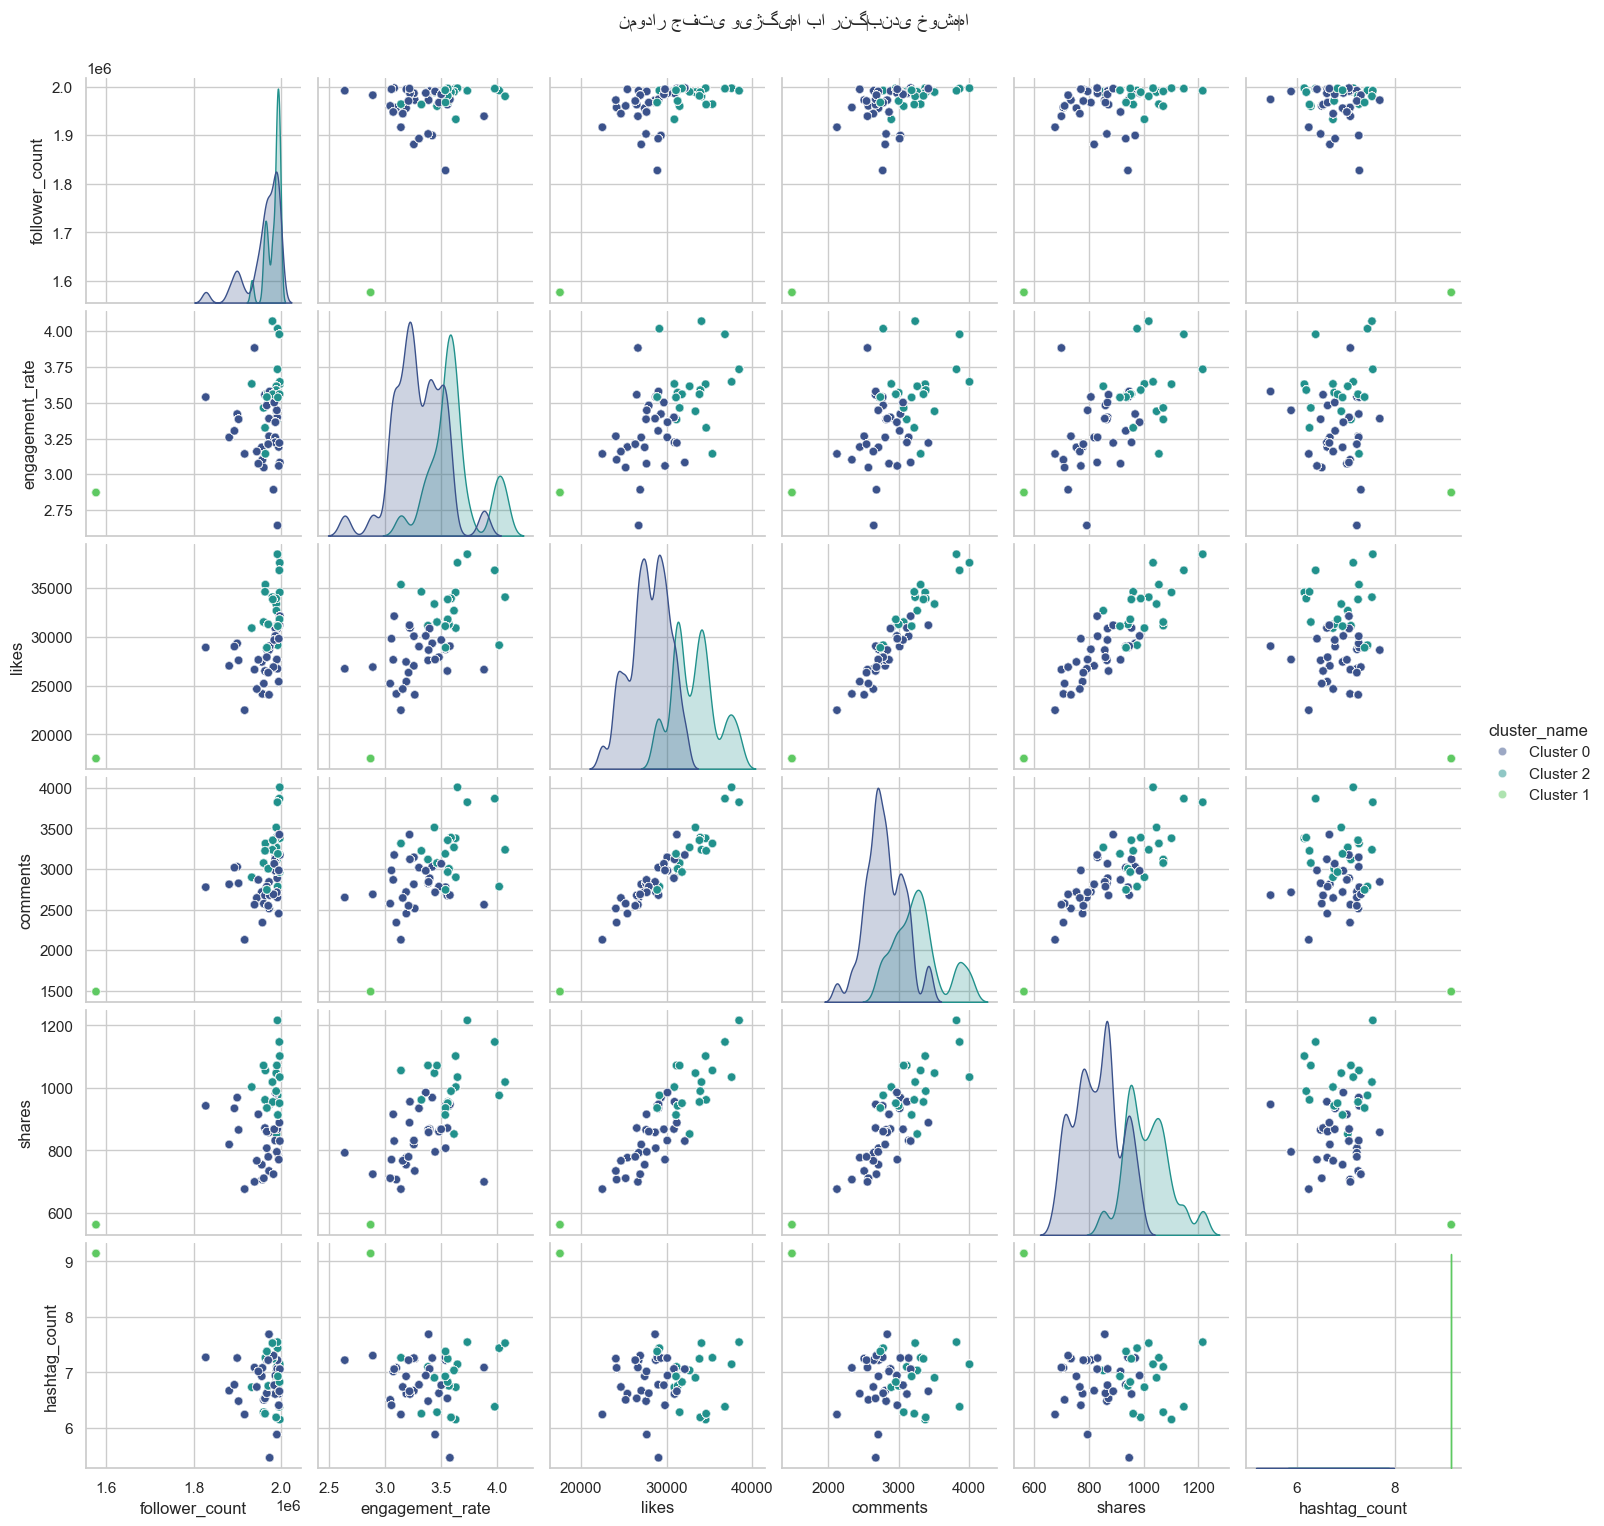

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

df_for_pairplot = df_grouped.copy()

# فرض: نام ستون خوشه‌ها 'cluster_3' است؛ اگر ندارید، این ستون را درست کنید یا اضافه کنید.
if 'cluster_3' not in df_for_pairplot.columns:
    print("ستون cluster_3 وجود ندارد! ابتدا خوشه‌ها را درست اضافه کنید.")
else:
    # تبدیل کلاسترها به رشته با نام فارسی
    cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}
    df_for_pairplot['cluster_name'] = df_for_pairplot['cluster_3'].map(cluster_names).astype(str)

    features = ['follower_count', 'engagement_rate', 'likes', 'comments', 'shares', 'hashtag_count']

    sns.pairplot(df_for_pairplot, vars=features, hue='cluster_name', palette='viridis', plot_kws={'alpha':0.5})
    plt.suptitle("نمودار جفتی ویژگی‌ها با رنگ‌بندی خوشه‌ها", y=1.02)
    plt.show()

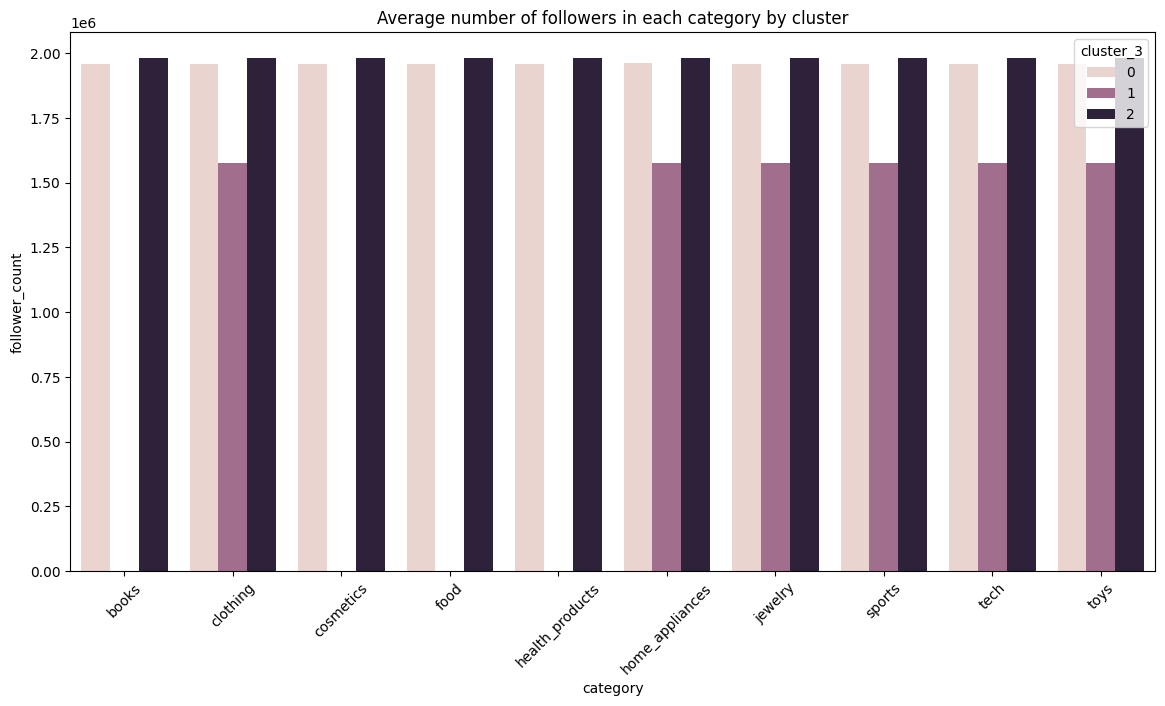

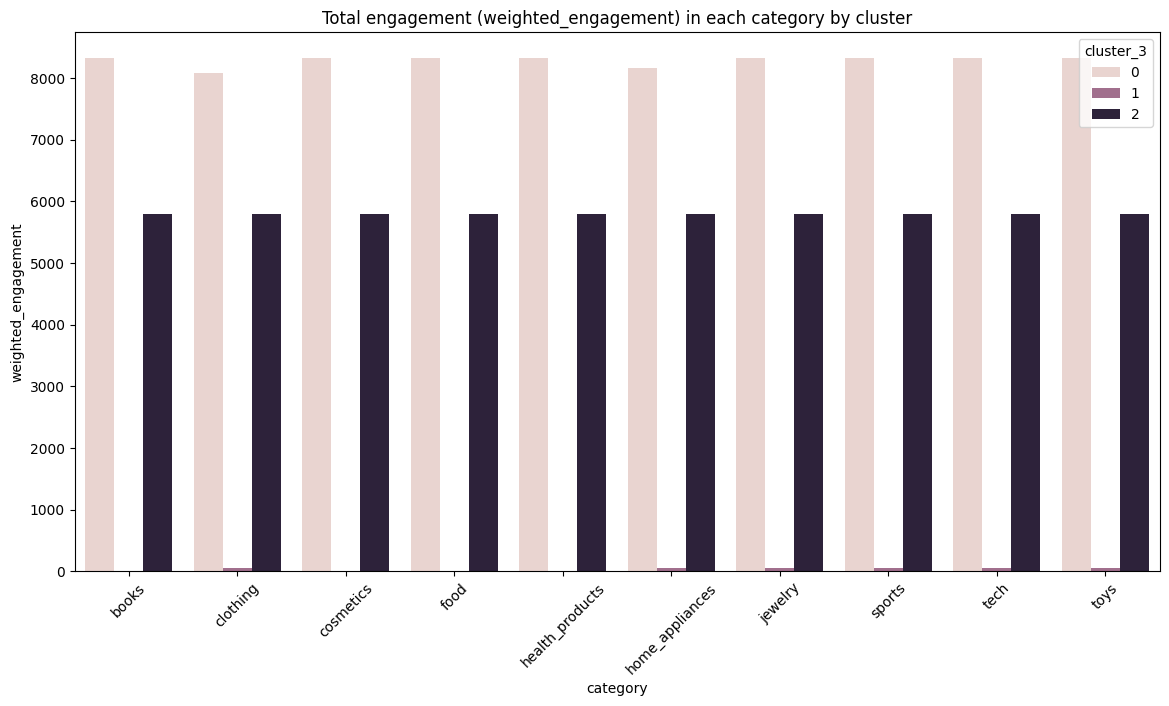

In [165]:
# اگر ستون category قبلاً در df_grouped هست، حذفش کن
if 'category' in df_grouped.columns:
    df_grouped = df_grouped.drop(columns=['category'])

# سپس merge بزن از دیتافریم اصلی df (یا دیتافریمی که category دارد)
df_grouped = df_grouped.merge(df[['influencer_id', 'category']].drop_duplicates(), on='influencer_id', how='left')

# حالا گروه‌بندی روی cluster_3 و category
grouped = df_grouped.groupby(['cluster_3', 'category']).agg({
    'follower_count': 'mean',
    'weighted_engagement': 'sum',
    'influencer_id': 'count'   # تعداد رکوردها در هر گروه
}).rename(columns={'influencer_id': 'count'}).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='category', y='follower_count', hue='cluster_3')
plt.title("Average number of followers in each category by cluster")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='category', y='weighted_engagement', hue='cluster_3')
plt.title("Total engagement (weighted_engagement) in each category by cluster")
plt.xticks(rotation=45)
plt.show()

=== Category Engagement Analysis ===
Category Performance Summary:
                engagement_rate                 likes comments  shares  \
                           mean count     std    mean     mean    mean   
category                                                                 
books                    0.0563   169  0.9740  0.6143   0.6118  0.5269   
clothing                 0.0339   146  1.0562  0.5348   0.4852  0.4655   
cosmetics                0.0021   158  1.0336  0.5097   0.4968  0.5209   
food                     0.0716   136  0.9270  0.6315   0.5666  0.4788   
health_products         -0.0336   124  0.9867  0.5292   0.4934  0.4737   
home_appliances         -0.0895   159  1.0445  0.4794   0.3844  0.3902   
jewelry                 -0.0512   160  0.9909  0.4473   0.4685  0.4464   
sports                  -0.0211   152  0.8659  0.4696   0.4279  0.3145   
tech                     0.0596   140  1.0460  0.6098   0.5926  0.4944   
toys                    -0.1050   142  0.8620

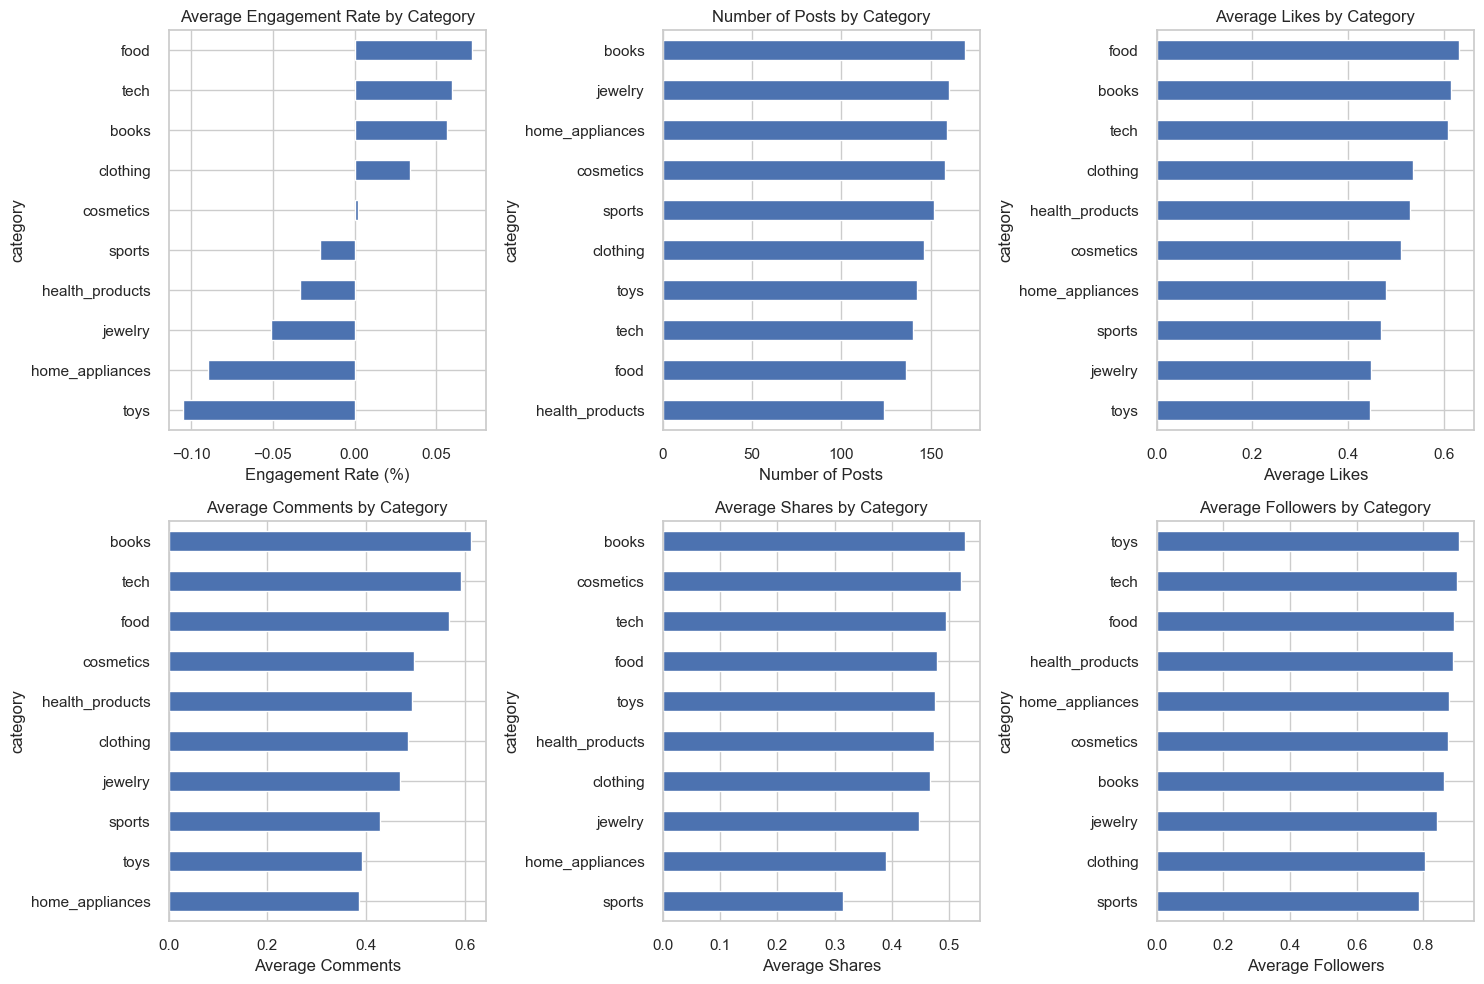

In [88]:
# Analyze which categories get the most engagement
print("=== Category Engagement Analysis ===")

# Calculate engagement metrics for each category
category_analysis = df_clean.groupby('category').agg({
    'engagement_rate': ['mean', 'count', 'std'],
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'follower_count': 'mean'
}).round(4)

print("Category Performance Summary:")
print(category_analysis)

# Visualize top performing categories
plt.figure(figsize=(15, 10))

# Engagement rate by category
plt.subplot(2, 3, 1)
category_analysis[('engagement_rate', 'mean')].sort_values(ascending=True).plot(kind='barh')
plt.title('Average Engagement Rate by Category')
plt.xlabel('Engagement Rate (%)')

# Number of posts by category
plt.subplot(2, 3, 2)
category_analysis[('engagement_rate', 'count')].sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Posts by Category')
plt.xlabel('Number of Posts')

# Average likes by category
plt.subplot(2, 3, 3)
category_analysis[('likes', 'mean')].sort_values(ascending=True).plot(kind='barh')
plt.title('Average Likes by Category')
plt.xlabel('Average Likes')

# Average comments by category
plt.subplot(2, 3, 4)
category_analysis[('comments', 'mean')].sort_values(ascending=True).plot(kind='barh')
plt.title('Average Comments by Category')
plt.xlabel('Average Comments')

# Average shares by category
plt.subplot(2, 3, 5)
category_analysis[('shares', 'mean')].sort_values(ascending=True).plot(kind='barh')
plt.title('Average Shares by Category')
plt.xlabel('Average Shares')

# Average followers by category
plt.subplot(2, 3, 6)
category_analysis[('follower_count', 'mean')].sort_values(ascending=True).plot(kind='barh')
plt.title('Average Followers by Category')
plt.xlabel('Average Followers')

plt.tight_layout()
plt.show()

In [89]:
features = ['follower_count', 'engagement_rate', 'likes', 'comments', 'shares', 'hashtag_count', 'weighted_engagement']

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df_grouped[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_grouped['cluster'] = clusters

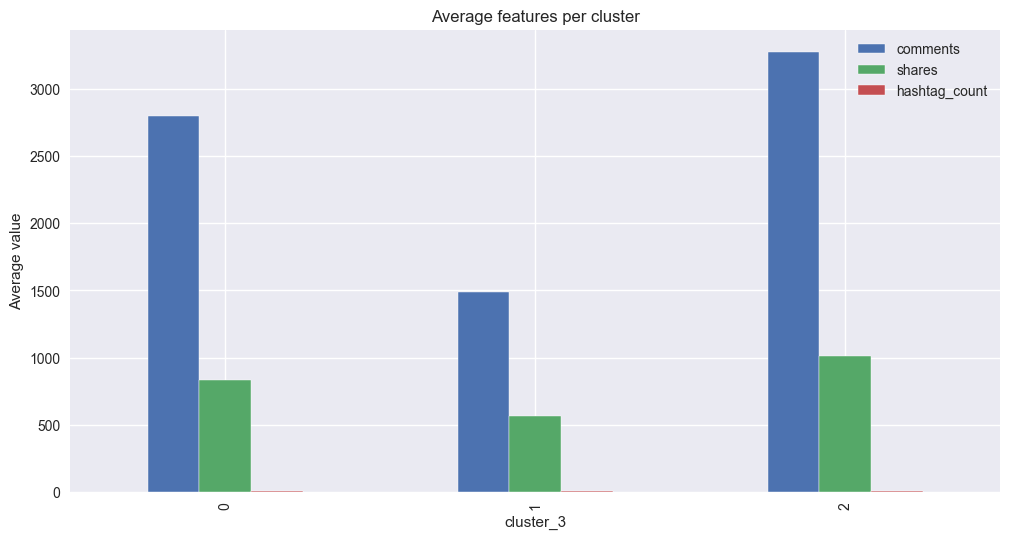

In [222]:
import matplotlib.pyplot as plt
import pandas as pd

features = [  'comments', 'shares', 'hashtag_count', ]

centroids = df_grouped.groupby('cluster_3')[features].mean()

centroids.plot(kind='bar', figsize=(12,6))
plt.title("Average features per cluster")
plt.ylabel("Average value")
plt.show()

In [169]:
features = ['follower_count', 'engagement_rate', 'likes', 'comments', 'shares', 'hashtag_count', 'weighted_engagement']

cluster_info = df_grouped.groupby('cluster_3')[features].mean()
print(cluster_info)

           follower_count  engagement_rate         likes     comments  \
cluster_3                                                               
0            1.959842e+06         3.295171  27979.988388  2803.482444   
1            1.576557e+06         2.872857  17539.500000  1488.071429   
2            1.981906e+06         3.606620  33245.488210  3277.340611   

                shares  hashtag_count  weighted_engagement  
cluster_3                                                   
0           830.681504       6.836826             4.581701  
1           562.071429       9.142857             3.906561  
2          1013.193013       6.908297             5.063999  


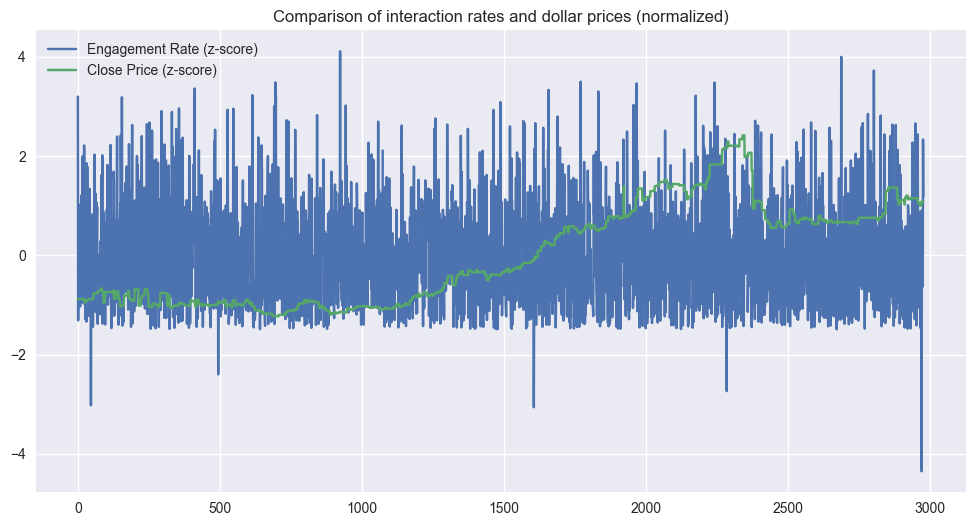

In [220]:
from scipy.stats import zscore

df_grouped['engagement_rate_z'] = zscore(df_scaled['weighted_engagement'])
df_grouped['close_z'] = zscore(df_scaled['close'])

plt.figure(figsize=(12,6))
plt.plot(df_grouped['engagement_rate_z'], label='Engagement Rate (z-score)')
plt.plot(df_grouped['close_z'], label='Close Price (z-score)')
plt.legend()
plt.title("Comparison of interaction rates and dollar prices (normalized)")
plt.show()

Available columns: ['post_id', 'date_persian', 'content_type', 'category', 'influencer_id', 'follower_count', 'likes', 'comments', 'shares', 'hashtag_count', 'is_sponsored', 'engagement_rate', 'open', 'low', 'high', 'close', 'change_amount', 'change_percent', 'date_gregorian', 'total_engagement', 'dollar_volatility', 'comments_per_likes', 'weighted_engagement', 'comment_ratio', 'like_engagement', 'comment_engagement', 'share_engagement', 'is_high_engagement', 'is_large_following', 'content_type_encoded', 'category_encoded', 'influencer_id_encoded', 'day', 'week', 'month']


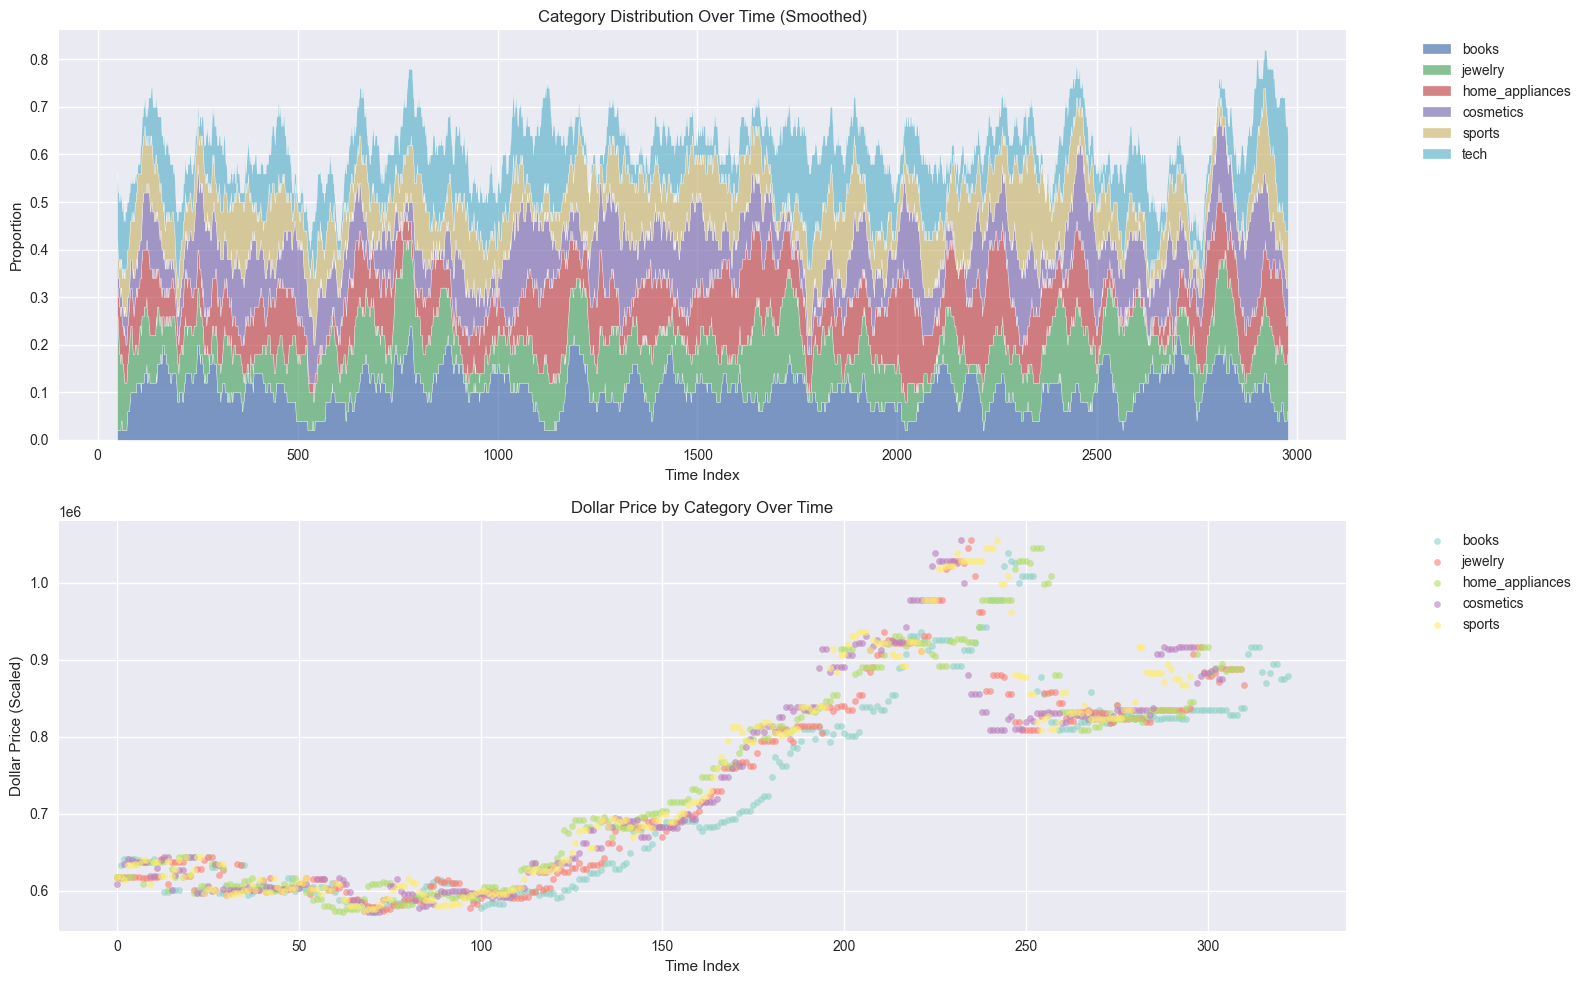

In [217]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(16, 10))

available_cols = df.columns.tolist()
print("Available columns:", available_cols)

# 1. Category Distribution Over Time (Smoothed)
plt.subplot(2, 1, 1)
if 'category' in available_cols:
    category_counts = df['category'].value_counts().head(6)
    category_data = pd.get_dummies(df['category'])[category_counts.index]
    category_data = category_data.rolling(window=50).mean()  # Smooth
    
    plt.stackplot(range(len(category_data)), 
                  [category_data[col] for col in category_counts.index],
                  labels=category_counts.index, alpha=0.7)
    plt.title('Category Distribution Over Time (Smoothed)')
    plt.xlabel('Time Index')
    plt.ylabel('Proportion')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    plt.text(0.5, 0.5, 'Category column not found', ha='center', va='center')
    plt.title('Category Distribution Over Time')

# 2. Dollar Price by Category Over Time (Scatter)
plt.subplot(2, 1, 2)
if all(col in available_cols for col in ['category', 'close']):
    top_categories = df['category'].value_counts().head(5).index
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_categories)))
    
    for i, category in enumerate(top_categories):
        cat_data = df[df['category'] == category]
        if len(cat_data) > 0:
            plt.scatter(range(len(cat_data)), cat_data['close'], 
                        alpha=0.6, s=20, color=colors[i], label=category)
    
    plt.xlabel('Time Index')
    plt.ylabel('Dollar Price (Scaled)')
    plt.title('Dollar Price by Category Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    plt.text(0.5, 0.5, 'Required columns not found', ha='center', va='center')
    plt.title('Dollar Price by Category Over Time')

plt.tight_layout()
plt.show()

In [98]:
df_grouped = df_clean.sort_values('date_gregorian')  # مرتب‌سازی بر اساس تاریخ

corr = df_grouped['engagement_rate'].corr(df_grouped['close'])
print(f"ضریب همبستگی بین نرخ تعامل و قیمت دلار: {corr:.3f}")

ضریب همبستگی بین نرخ تعامل و قیمت دلار: -0.005


/var/folders/p1/hmpltph13p50g2nkfpjrjcxh0000gn/T/ipykernel_59823/1525479246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_gregorian'] = pd.to_datetime(df['date_gregorian'])


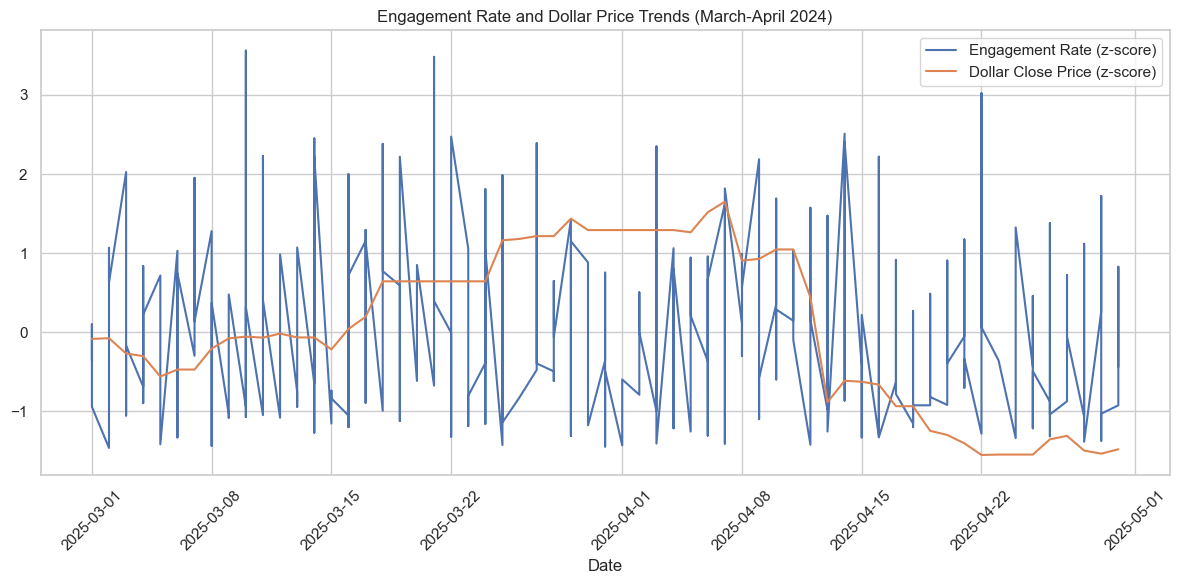

In [215]:

from scipy.stats import zscore

# Ensure date column is datetime
df['date_gregorian'] = pd.to_datetime(df['date_gregorian'])

# Filter for March and April 2024
df_filtered = df[(df['date_gregorian'].dt.month.isin([3,4])) & (df['date_gregorian'].dt.year == 2025)].copy()

# Normalize using z-score
df_filtered['engagement_rate_z'] = zscore(df_filtered['engagement_rate'])
df_filtered['close_z'] = zscore(df_filtered['close'])

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_filtered['date_gregorian'], df_filtered['engagement_rate_z'], label='Engagement Rate (z-score)')
plt.plot(df_filtered['date_gregorian'], df_filtered['close_z'], label='Dollar Close Price (z-score)')
plt.title('Engagement Rate and Dollar Price Trends (March-April 2024)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()